# Project 1: Explanatory Data Analysis & Data Presentation (Movies Dataset)

## PACKAGE IMPORTS

In [1]:
import importlib.util
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import pandas as pd
import pyperclip3 as clip
import seaborn as sns
import xlwings as xw
import math
import pprint
from wordcloud import WordCloud

from io import StringIO
from pathlib import Path
from icecream import ic
from IPython.display import HTML, display
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

## IMPORT DATA

In [2]:
df = pd.read_csv("movies_complete.csv")

## INCORPORATE OTHER FUNCTIONS FROM IMPORT DIRECTORY

I like to use several utility functions I've made over the years that help me work with data in Jupyter notebooks. 

This will be used in this project as well as many others in the repo. 

In [3]:
from pathlib import Path
import importlib.util 

def load_function(module_name, function_name):
    """
    Dynamically imports a specific function from a module, designed to work
    in a Jupyter notebook context or a standard Python script.

    Parameters
    ----------
    module_name : str
        The name of the module (without the .py extension).
    function_name : str
        The name of the function to import from the module.

    Returns
    -------
    function or None
        The imported function, or None if something went wrong.

    Examples
    --------
    Assume we have a Python module named 'math_operations.py' with a function named 'add':

    # math_operations.py
    def add(a, b):
        return a + b

    Here is how you can use `load_function` to dynamically load and use the 'add' function:

    >>> loaded_add_function = load_function("math_operations", "add")
    >>> if loaded_add_function:
    ...     result = loaded_add_function(2, 3)
    ...     print(f"Result: {result}")
    ...
    Result: 5
    """
    # Use the current working directory as the base for the 'imports' directory
    project_root = Path.cwd().parent  # This works if the notebook's working directory is the project root
    module_path = project_root / "imports" / f"{module_name}.py"

    spec = importlib.util.spec_from_file_location(module_name, str(module_path))
    if spec is None:
        print(f"Spec not found for module: {module_name}")
        return None

    module = importlib.util.module_from_spec(spec)
    try:
        spec.loader.exec_module(module)
        return getattr(module, function_name, None)
    except Exception as e:
        print(f"Error loading function {function_name} from module {module_name}: {e}")
        return None


In [4]:
# Test to see if the 'load_function' function is available.
hello_world = load_function('hello', 'hello_world')
hello_world()

Hello World!


__Features__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [5]:
# Get some info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

We need to know how many values are actually missing in the dataset. We also see `release_date` as a string (object) when it should be a date. 

In [6]:
# How many values are actually missing from the dataset?
missing_values_fnc = load_function('null_values_sum_fnc', 'null_values_sum')
missing_values_df = missing_values_fnc(df)
missing_values_df

Column  Null Values Percentage
5   belongs_to_collection        40228     90.01%
8            revenue_musd        37306     83.48%
7             budget_musd        35837     80.19%
2                 tagline        24407     54.61%
9    production_companies        11335     25.36%
10   production_countries         5856     13.10%
16       spoken_languages         3597      8.05%
12           vote_average         2614      5.85%
18                   cast         2189      4.90%
4                  genres         2105      4.71%
14                runtime         1512      3.38%
15               overview          951      2.13%
21               director          731      1.64%
17            poster_path          224      0.50%
3            release_date           34      0.08%
6       original_language           10      0.02%
19              cast_size            0      0.00%
20              crew_size            0      0.00%
0                      id            0      0.00%
13             popularity            0      0.00%
1                   title            0      0.00%
11             vote_count            0      0.00%

In [7]:
# Load the missing values df into Excel for a better viewing.
view_df_in_excel = load_function('load_dataframe_to_excel', 'open_df_in_excel')
display_missing_in_xl = input('Do you want to see the missing values in Excel?')
if display_missing_in_xl == 'y':
    view_df_in_excel(missing_values_df)

<a href="http://imageshack.com/a/img922/8443/MNIQPC.png"><img src="http://imagizer.imageshack.us/v2/256x0q90/922/MNIQPC.png"></a>

| Column                | Null Values | Percentage |
|-----------------------|-------------|------------|
| belongs_to_collection | 40228       | 90.01%     |
| revenue_musd          | 37306       | 83.48%     |
| budget_musd           | 35837       | 80.19%     |
| tagline               | 24407       | 54.61%     |
| production_companies  | 11335       | 25.36%     |
| production_countries  | 5856        | 13.10%     |
| spoken_languages      | 3597        | 8.05%      |
| vote_average          | 2614        | 5.85%      |
| cast                  | 2189        | 4.90%      |
| genres                | 2105        | 4.71%      |
| runtime               | 1512        | 3.38%      |
| overview              | 951         | 2.13%      |
| director              | 731         | 1.64%      |
| poster_path           | 224         | 0.50%      |
| release_date          | 34          | 0.08%      |
| original_language     | 10          | 0.02%      |
| id                    | 0           | 0.00%      |
| title                 | 0           | 0.00%      |
| vote_count            | 0           | 0.00%      |
| popularity            | 0           | 0.00%      |
| cast_size             | 0           | 0.00%      |
| crew_size             | 0           | 0.00%      |

**Image Commentary**

In the image above (and markdown table) you can see that I sorted the output in Excel by the highest to lowest percentage of missing values. Interestingly, the third highest is the budget in millions of US dollars. My guess is that these will affect other columns statistically this has to be an important column.  

We'll have to deal with missing values at some point, but for now, we just explore the data set.

How many values exist in each column? 

In [8]:
# We'll need to look at the unique values in the dataset. These are the number of values in each column.
unique_values_df = load_function('return_unique_counts_fnc', 'unique_values_by_column')
print('Count of Values by Column:')
unique_values_df(df)

Count of Values by Column:


id                       44691
poster_path              44456
overview                 43715
popularity               43204
cast                     42166
title                    41605
production_companies     22537
tagline                  20171
director                 17349
release_date             17225
revenue_musd              6850
genres                    4044
production_countries      2377
spoken_languages          1828
vote_count                1820
belongs_to_collection     1691
budget_musd               1218
runtime                    352
crew_size                  189
cast_size                  151
vote_average                92
original_language           89
dtype: int64

In [9]:
# We can look at the complete dataset in Excel because it's actually not too big
display_counts_in_xl = input('Do you want to see the counts in Excel? (y/n)')
if display_counts_in_xl == 'y':
    view_df_in_excel(df)

**Dataframe Commentary**

I like to load into Excel, then use Power Query to get a histogram of all the columns. I can generally see everything I need to know in the Power Query view. However, Pandas has these features, so they will be loaded here for viewers of the notebook.


Which columns are numerical and which are categorical? 

In [10]:
# Get a slightly better understanding of the data types, e.g., are they numerical or categorical?
var_types = load_function('identify_var_types_fnc', 'categorize_column_types')
if var_types:
    var_types(df)
else:
    print('Sorry, could not display the variable types of the dataset.')

{'categorical': ['title',
                 'tagline',
                 'release_date',
                 'genres',
                 'belongs_to_collection',
                 'original_language',
                 'production_companies',
                 'production_countries',
                 'overview',
                 'spoken_languages',
                 'poster_path',
                 'cast',
                 'director'],
 'numerical': ['id',
               'budget_musd',
               'revenue_musd',
               'vote_count',
               'vote_average',
               'popularity',
               'runtime',
               'cast_size',
               'crew_size']}


The majority of the data is categorical, which is handled differently than numerical. For example we did a chart of histograms for the numerical data, but this doesn't provide much insight. So we did bar charts for the categorical data. Going forward we have to keep this in mind. 

## BACKUP THE DATASET BEFORE MAKING CHANGES.

In [11]:
df_backup = df.copy() # Copy the original dataset as my new working dataset and keep a backup if needed here. 

Change the `release_date` column to a datetime object by using infer_datetime_format().

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

In [13]:
# Load the missing values df into Excel for a better viewing.
view_df_in_excel = load_function('load_dataframe_to_excel', 'open_df_in_excel')
display_df_in_xl = input('Do you want to see the dataframe in Excel? (y/n)')
if display_df_in_xl == 'y':
    view_df_in_excel(df)


In [14]:
num_rows, num_columns = df.shape
display("Columns: ", num_columns)
display("Rows: ", num_rows)
clip.copy(str(num_rows))

genre_values = df['genres'].unique()
genre_series = pd.Series(genre_values)
display(genre_series)

cast_values = df['cast'].unique()
cast_series = pd.Series(cast_values)
display(cast_series)


'Columns: '

22

'Rows: '

44691

0               Animation|Comedy|Family
1              Adventure|Fantasy|Family
2                        Romance|Comedy
3                  Comedy|Drama|Romance
4                                Comedy
                     ...               
4040       Fantasy|Comedy|Romance|Drama
4041                Comedy|Horror|Drama
4042         Crime|Comedy|Action|Family
4043     Action|Mystery|Thriller|Horror
4044    Family|Animation|Romance|Comedy
Length: 4045, dtype: object

0        Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1        Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2        Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...
3        Whitney Houston|Angela Bassett|Loretta Devine|...
4        Steve Martin|Diane Keaton|Martin Short|Kimberl...
                               ...                        
42162    Patrick Bergin|Uma Thurman|David Morrissey|Jür...
42163              Leila Hatami|Kourosh Tahami|Elham Korda
42164    Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...
42165    Erika Eleniak|Adam Baldwin|Julie du Page|James...
42166    Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...
Length: 42167, dtype: object

There's really a vast array of genres and actors, but this notebook is not concerned with studying these values. 

In [15]:
# We only want to see numerical data here in the series summary (statistics) not categorical data.
series_summary_numerical = df.describe(include=['number'])
print('Series Summary (numerical):\n')
display(series_summary_numerical)

Series Summary (numerical):



id  budget_musd  revenue_musd  vote_count  vote_average  \
count  44691.00      8854.00       7385.00    44691.00      42077.00   
mean  107186.24        21.67         68.97      111.65          6.00   
std   111806.36        34.36        146.61      495.32          1.28   
min        2.00         0.00          0.00        0.00          0.00   
25%    26033.50         2.00          2.41        3.00          5.30   
50%    59110.00         8.20         16.87       10.00          6.10   
75%   154251.00        25.00         67.64       35.00          6.80   
max   469172.00       380.00       2787.97    14075.00         10.00   

       popularity  runtime  cast_size  crew_size  
count    44691.00 43179.00   44691.00   44691.00  
mean         2.96    97.57      12.48      10.31  
std          6.04    34.65      12.12      15.89  
min          0.00     1.00       0.00       0.00  
25%          0.40    86.00       6.00       2.00  
50%          1.15    95.00      10.00       6.00  
75%          3.77   107.00      15.00      12.00  
max        547.49  1256.00     313.00     435.00

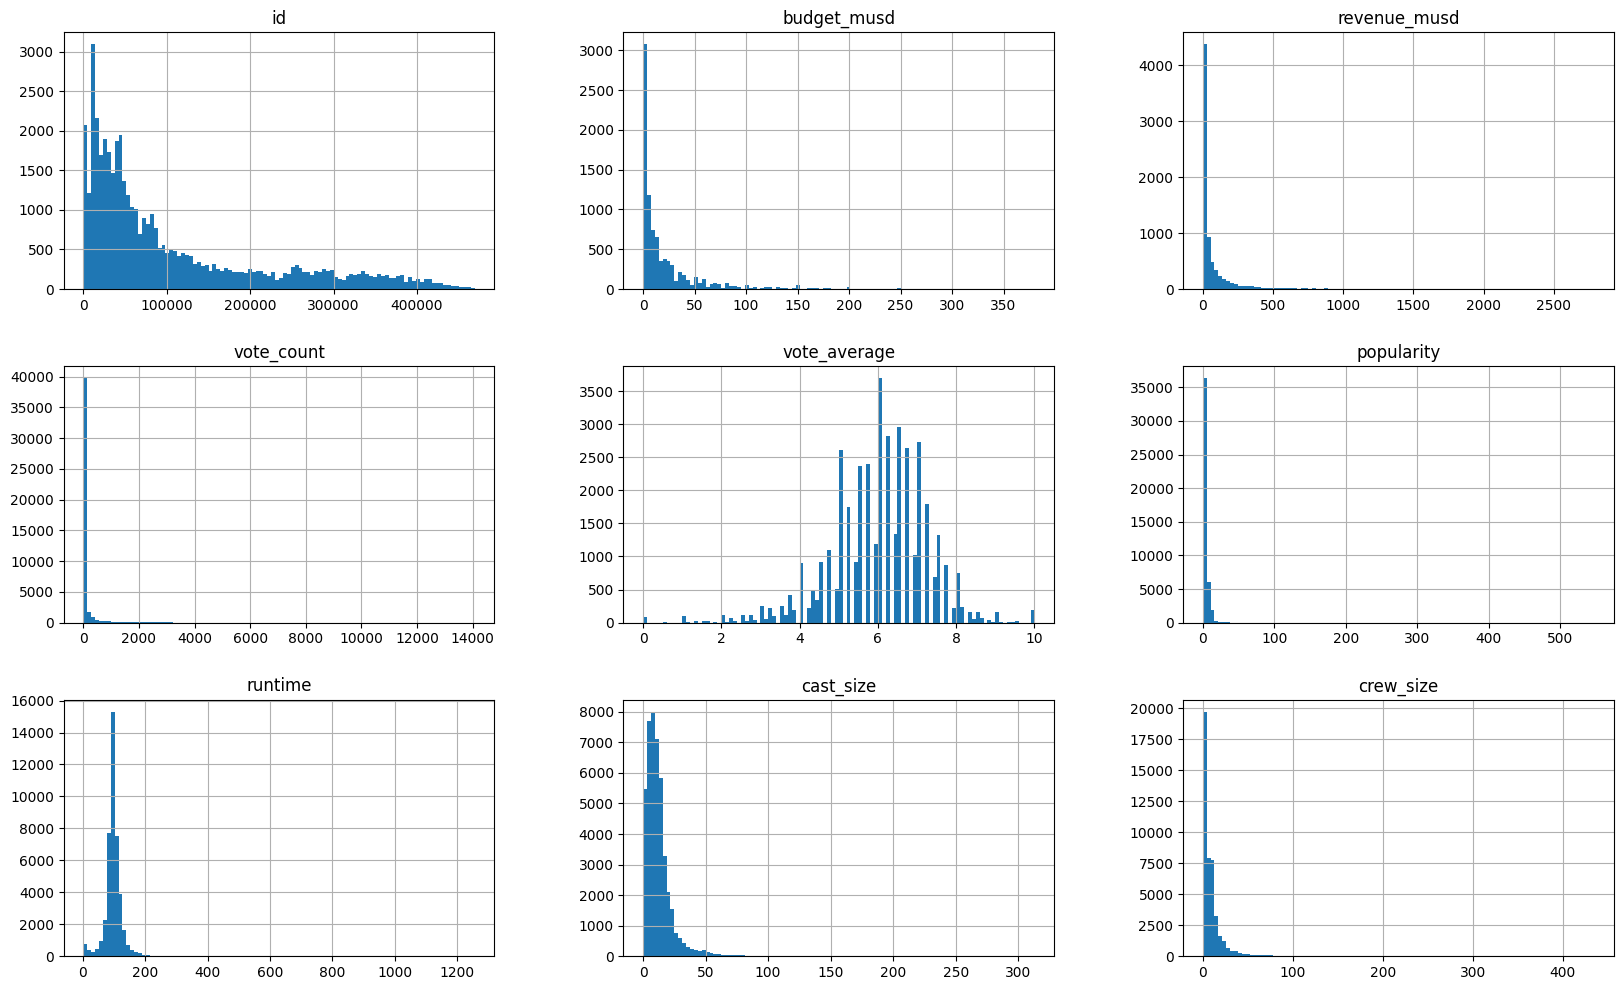

In [16]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical columns
df[numerical_columns].hist(figsize=(20, 12), bins=100)
plt.show()


In [26]:
# Beyond the histogram, I want to create bar charts for each of the
# columns. To do this I need to know the binsize. A custom function
# returns these values. 
bin_size_fnc = load_function('calculate_binsize_for_columns_fnc', 'calculate_binsize_for_columns')
if bin_size_fnc:
    binsize_df = bin_size_fnc(df)
    display(binsize_df)
else:
    print('Sorry, could not calculate the bin size for the dataset.')

Column  Bin Size        Type
0            id        64  Continuous
1   budget_musd       170  Continuous
2  revenue_musd       416  Continuous
3    vote_count      7804  Continuous
4  vote_average       115  Continuous
5    popularity      2885  Continuous
6       runtime      1048  Continuous
7     cast_size       617  Continuous
8     crew_size       771  Continuous

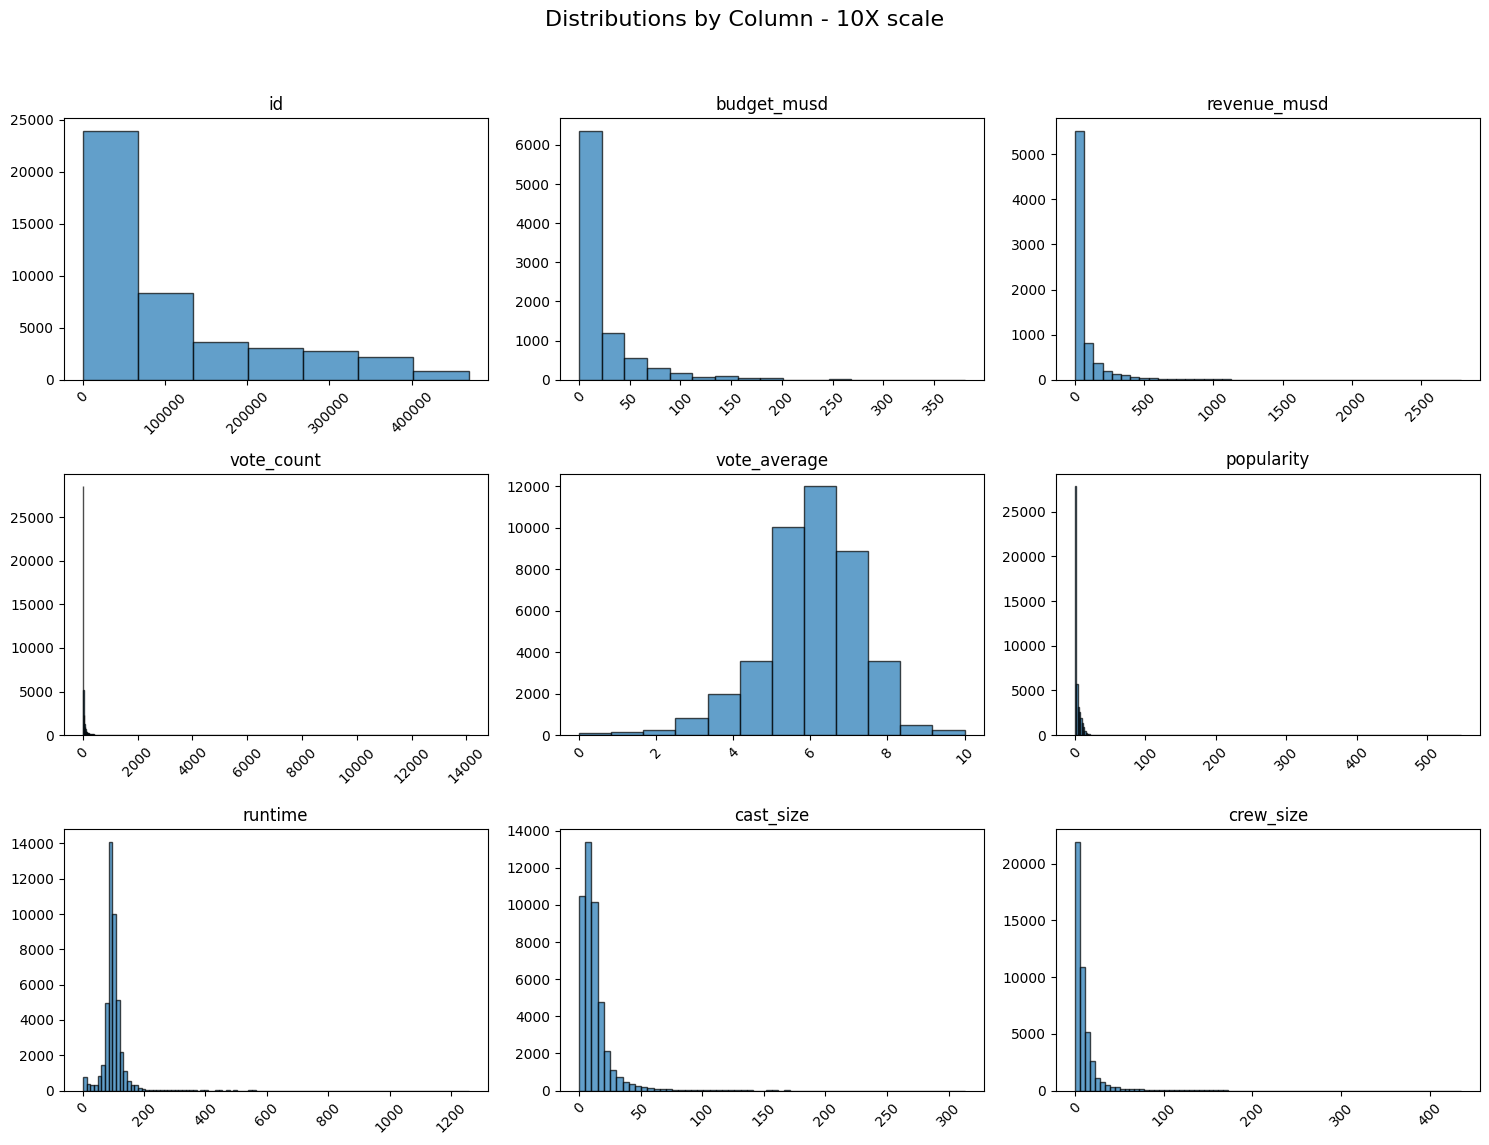

In [27]:
plot_columns = load_function(
    'plot_column_distributions_fnc', 
    'plot_column_distributions'
)
plot_columns(df, binsize_df, grid_title='Distributions by Column - 10X scale')

In [28]:
# just a breif peek at the frequency of certain values
df.budget_musd.value_counts(dropna = False).head(20)

budget_musd
NaN      35837
5.00       286
10.00      258
20.00      243
2.00       241
15.00      226
3.00       220
25.00      206
1.00       195
30.00      189
4.00       180
6.00       173
12.00      171
40.00      166
8.00       155
35.00      141
0.50       141
7.00       137
50.00      124
1.50       119
Name: count, dtype: int64

In [29]:
df.revenue_musd.value_counts(dropna = False).head(20)

revenue_musd
NaN      37306
12.00       20
10.00       19
11.00       19
2.00        18
6.00        17
5.00        14
0.50        13
8.00        13
0.00        12
14.00       12
7.00        11
3.00        10
1.00        10
20.00       10
0.00         9
1.50         9
4.00         9
30.00        8
4.10         8
Name: count, dtype: int64

In [30]:
df.vote_average.value_counts(dropna = False)

vote_average
NaN     2614
6.00    2421
5.00    1969
7.00    1859
6.50    1705
        ... 
9.40       3
9.60       1
9.80       1
0.70       1
1.10       1
Name: count, Length: 93, dtype: int64

In [31]:
df.vote_count.value_counts()

vote_count
1.00       3186
2.00       3056
3.00       2729
0.00       2614
4.00       2442
           ... 
2755.00       1
1187.00       1
4200.00       1
3322.00       1
2712.00       1
Name: count, Length: 1820, dtype: int64

In [32]:
df.describe(include = "object")

title                 tagline genres belongs_to_collection  \
count        44691                   20284  42586                  4463   
unique       41605                   20171   4044                  1691   
top     Cinderella  Based on a true story.  Drama       The Bowery Boys   
freq            11                       7   4935                    29   

       original_language       production_companies      production_countries  \
count              44681                      33356                     38835   
unique                89                      22537                      2377   
top                   en  Metro-Goldwyn-Mayer (MGM)  United States of America   
freq               31755                        741                     17723   

                                    overview spoken_languages  \
count                                  43740            41094   
unique                                 43715             1828   
top     Adaptation of the Jane Austen novel.          English   
freq                                       3            22189   

                                              poster_path            cast  \
count                                               44467           42502   
unique                                              44456           42166   
top     <img src='http://image.tmdb.org/t/p/w185//qW1o...  Georges Méliès   
freq                                                    3              24   

         director  
count       43960  
unique      17349  
top     John Ford  
freq           66

In [33]:
# Cinderella is the most frequent title, duplicate? no it is just different years
df[df.title == "Cinderella"] # Is this a duplicate title?

id       title                             tagline release_date  \
984     11224  Cinderella  The greatest love story ever told.   1950-03-04   
12988   42884  Cinderella                                 NaN   1997-11-02   
23254   92349  Cinderella                                 NaN   1914-12-28   
23265  105875  Cinderella          The version children love!   2002-08-06   
28073  261985  Cinderella                                 NaN   2011-10-30   
28340  150689  Cinderella     Midnight is just the beginning.   2015-03-12   
33805   42651  Cinderella                                 NaN   1947-11-28   
35114   44459  Cinderella                                 NaN   1957-03-31   
35116  289673  Cinderella                                 NaN   2000-01-01   
40439  114108  Cinderella                                 NaN   1899-10-01   
44633   98604  Cinderella                                 NaN   2012-02-14   

                                      genres  belongs_to_collection  \
984         Family|Fantasy|Animation|Romance  Cinderella Collection   
12988  TV Movie|Family|Fantasy|Music|Romance                    NaN   
23254                          Fantasy|Drama                    NaN   
23265               Animation|Family|Fantasy                    NaN   
28073                        Family|TV Movie                    NaN   
28340           Romance|Fantasy|Family|Drama                    NaN   
33805                  Comedy|Family|Fantasy                    NaN   
35114                          Drama|Romance                    NaN   
35116                                    NaN                    NaN   
40439  Fantasy|Horror|Science Fiction|Family                    NaN   
44633                         Comedy|Romance                    NaN   

      original_language  budget_musd  revenue_musd  \
984                  en         2.90        263.59   
12988                en          NaN           NaN   
23254                en          NaN           NaN   
23265                en          NaN           NaN   
28073                en          NaN           NaN   
28340                en        95.00        543.51   
33805                ru          NaN           NaN   
35114                en          NaN           NaN   
35116                en          NaN           NaN   
40439                fr          NaN           NaN   
44633                ru          NaN           NaN   

                                    production_companies  \
984           RKO Radio Pictures|Walt Disney Productions   
12988  Walt Disney Television|Citadel Entertainment|S...   
23254                                                NaN   
23265                            GoodTimes Entertainment   
28073  Beta Film|Lux Vide|ARD/Degeto Film GmbH|Rai Fi...   
28340  Walt Disney Pictures|Genre Films|Beagle Pug Fi...   
33805                                            Lenfilm   
35114                                                NaN   
35116                                                NaN   
40439                           Star-Film|Georges Méliès   
44633             Channel One Russia|Central Partnership   

                          production_countries  vote_count  vote_average  \
984                   United States of America     1760.00          6.80   
12988                 United States of America       28.00          6.10   
23254                 United States of America        7.00          5.40   
23265           Japan|United States of America        2.00          6.00   
28073                                    Italy        9.00          5.30   
28340  United Kingdom|United States of America     2426.00          6.70   
33805                                   Russia        5.00          4.80   
35114                 United States of America        5.00          5.90   
35116                                      NaN        5.00          5.60   
40439                                   France       19.00          5.50   
44633          

## The best and the worst movies... (Part 1)

In [34]:
pd.options.display.max_colwidth = 200

In [35]:
# Take a peek at the columns and decide which ones are important.
columns_peek = df.columns.to_list()
display(columns_peek)

['id',
 'title',
 'tagline',
 'release_date',
 'genres',
 'belongs_to_collection',
 'original_language',
 'budget_musd',
 'revenue_musd',
 'production_companies',
 'production_countries',
 'vote_count',
 'vote_average',
 'popularity',
 'runtime',
 'overview',
 'spoken_languages',
 'poster_path',
 'cast',
 'cast_size',
 'crew_size',
 'director']

In [36]:
# Make a copy of the data frame that only shows the most important columns for analysis.
target_columns_df = df[
    [
        "poster_path", "title", "budget_musd", "revenue_musd",
        "vote_count", "vote_average", "popularity", 'release_date'
    ]
].copy()
target_columns_df

poster_path  \
0      <img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>   
1      <img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>   
2      <img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>   
3      <img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>   
4      <img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>   
...                                                                                                  ...   
44686  <img src='http://image.tmdb.org/t/p/w185//pfC8gZ1BQANxxdadIMpdywbPG9X.jpg' style='height:100px;'>   
44687  <img src='http://image.tmdb.org/t/p/w185//xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg' style='height:100px;'>   
44688  <img src='http://image.tmdb.org/t/p/w185//eGgakGLQQzUwrCfTxcGu3mXPf8g.jpg' style='height:100px;'>   
44689  <img src='http://image.tmdb.org/t/p/w185//aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg' style='height:100px;'>   
44690  <img src='http://image.tmdb.org/t/p/w185//oxFEU4WOMWdXF3fdtYUJZMzc5ob.jpg' style='height:100px;'>   

                             title  budget_musd  revenue_musd  vote_count  \
0                        Toy Story        30.00        373.55     5415.00   
1                          Jumanji        65.00        262.80     2413.00   
2                 Grumpier Old Men          NaN           NaN       92.00   
3                Waiting to Exhale        16.00         81.45       34.00   
4      Father of the Bride Part II          NaN         76.58      173.00   
...                            ...          ...           ...         ...   
44686                       Subdue          NaN           NaN        1.00   
44687          Century of Birthing          NaN           NaN        3.00   
44688                     Betrayal          NaN           NaN        6.00   
44689             Satan Triumphant          NaN           NaN        0.00   
44690                     Queerama          NaN           NaN        0.00   

       vote_average  popularity release_date  
0              7.70       21.95   1995-10-30  
1              6.90       17.02   1995-12-15  
2              6.50       11.71   1995-12-22  
3              6.10        3.86   1995-12-22  
4              5.70        8.39   1995-02-10  
...             ...         ...          ...  
44686          4.00        0.07          NaT  
44687          9.00        0.18   2011-11-17  
44688          3.80        0.90   2003-08-01  
44689           NaN        0.00   1917-10-21  
44690           NaN        0.16   2017-06-09  

[44691 rows x 8 columns]

In [37]:
# MUSD note:
#^ Anywhere it says 'musd' then we are looking at the million US dollar amounts.
#^ These lines create new columns that show profit and ROI for the movies. 

target_columns_df["profit_musd"] = df.revenue_musd.sub(df.budget_musd)
target_columns_df["roi"] = df.revenue_musd.div(df.budget_musd)


In [38]:
target_columns_df.head(5)

poster_path  \
0  <img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>   
1  <img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>   
2  <img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>   
3  <img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>   
4  <img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>   

                         title  budget_musd  revenue_musd  vote_count  \
0                    Toy Story        30.00        373.55     5415.00   
1                      Jumanji        65.00        262.80     2413.00   
2             Grumpier Old Men          NaN           NaN       92.00   
3            Waiting to Exhale        16.00         81.45       34.00   
4  Father of the Bride Part II          NaN         76.58      173.00   

   vote_average  popularity release_date  profit_musd   roi  
0          7.70       21.95   1995-10-30       343.55 12.45  
1          6.90       17.02   1995-12-15       197.80  4.04  
2          6.50       11.71   1995-12-22          NaN   NaN  
3          6.10        3.86   1995-12-22        65.45  5.09  
4          5.70        8.39   1995-02-10          NaN   NaN

In [39]:
# Rename the columns.
target_columns_df.columns = [
    "Poster Path", "Title", "Budget", "Revenue", "Votes", 
    "Average Rating", "Popularity","Released", "Profit", "ROI"
]

In [40]:
if var_types:
    var_types(target_columns_df)
else:
    print('Sorry, could not display the variable types of the dataset.')


{'categorical': ['Poster Path', 'Title'],
 'numerical': ['Budget',
               'Revenue',
               'Votes',
               'Average Rating',
               'Popularity',
               'Profit',
               'ROI']}


In [41]:
target_columns_df.columns.to_list()

['Poster Path',
 'Title',
 'Budget',
 'Revenue',
 'Votes',
 'Average Rating',
 'Popularity',
 'Released',
 'Profit',
 'ROI']

In [42]:
# Set the movie title as the index.
target_columns_df.set_index("Title", inplace = True)

In [43]:
target_columns_df

Poster Path  \
Title                                                                                                                            
Toy Story                    <img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>   
Jumanji                      <img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>   
Grumpier Old Men             <img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>   
Waiting to Exhale            <img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>   
Father of the Bride Part II  <img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>   
...                                                                                                                        ...   
Subdue                       <img src='http://image.tmdb.org/t/p/w185//pfC8gZ1BQANxxdadIMpdywbPG9X.jpg' style='height:100px;'>   
Century of Birthing          <img src='http://image.tmdb.org/t/p/w185//xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg' style='height:100px;'>   
Betrayal                     <img src='http://image.tmdb.org/t/p/w185//eGgakGLQQzUwrCfTxcGu3mXPf8g.jpg' style='height:100px;'>   
Satan Triumphant             <img src='http://image.tmdb.org/t/p/w185//aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg' style='height:100px;'>   
Queerama                     <img src='http://image.tmdb.org/t/p/w185//oxFEU4WOMWdXF3fdtYUJZMzc5ob.jpg' style='height:100px;'>   

                             Budget  Revenue   Votes  Average Rating  \
Title                                                                  
Toy Story                     30.00   373.55 5415.00            7.70   
Jumanji                       65.00   262.80 2413.00            6.90   
Grumpier Old Men                NaN      NaN   92.00            6.50   
Waiting to Exhale             16.00    81.45   34.00            6.10   
Father of the Bride Part II     NaN    76.58  173.00            5.70   
...                             ...      ...     ...             ...   
Subdue                          NaN      NaN    1.00            4.00   
Century of Birthing             NaN      NaN    3.00            9.00   
Betrayal                        NaN      NaN    6.00            3.80   
Satan Triumphant                NaN      NaN    0.00             NaN   
Queerama                        NaN      NaN    0.00             NaN   

                             Popularity   Released  Profit   ROI  
Title                                                             
Toy Story                         21.95 1995-10-30  343.55 12.45  
Jumanji                           17.02 1995-12-15  197.80  4.04  
Grumpier Old Men                  11.71 1995-12-22     NaN   NaN  
Waiting to Exhale                  3.86 1995-12-22   65.45  5.09  
Father of the Bride Part II        8.39 1995-02-10     NaN   NaN  
...                                 ...        ...     ...   ...  
Subdue                             0.07        NaT     NaN   NaN  
Century of Birthing                0.18 2011-11-17     NaN   NaN  
Betrayal                           0.90 2003-08-01     NaN   NaN  
Satan Triumphant                   0.00 1917-10-21     NaN   NaN  
Queerama                           0.16 2017-06-09     NaN   NaN  

[44691 rows x 9 columns]

In [44]:
# Look at the poster path as a string
target_columns_df.iloc[0,0]

"<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>"

In [45]:
# Look at a subset of the dataframe to see the poster url and budget.
subset = target_columns_df.iloc[:5, :2]
subset

Poster Path  \
Title                                                                                                                            
Toy Story                    <img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>   
Jumanji                      <img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>   
Grumpier Old Men             <img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>   
Waiting to Exhale            <img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>   
Father of the Bride Part II  <img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>   

                             Budget  
Title                                
Toy Story                     30.00  
Jumanji                       65.00  
Grumpier Old Men                NaN  
Waiting to Exhale             16.00  
Father of the Bride Part II     NaN

In [46]:
# Look at the subset as a web preview
HTML(subset.to_html(escape=False))

In [47]:
# What's the highest rated movie? 
target_columns_df.sort_values(by = "Average Rating", ascending = False)

Poster Path  \
Title                                                                                                                                           
Portrait of a Young Man in Three Movements                                                                                                NaN   
Brave Revolutionary                         <img src='http://image.tmdb.org/t/p/w185//zAb2YxgYSJTcloGTHAA9ogOVq7M.jpg' style='height:100px;'>   
Other Voices Other Rooms                    <img src='http://image.tmdb.org/t/p/w185//4ifPBA4AjRQWxgVJAwSwWp6nFCa.jpg' style='height:100px;'>   
The Lion of Thebes                          <img src='http://image.tmdb.org/t/p/w185//tdOcmIjI8sx9RZIsVgOlq4kQgJ4.jpg' style='height:100px;'>   
Katt Williams: Priceless: Afterlife         <img src='http://image.tmdb.org/t/p/w185//wKrH5tKdJa3y5jqAQM1eYmkXbHX.jpg' style='height:100px;'>   
...                                                                                                                                       ...   
Altar of Fire                               <img src='http://image.tmdb.org/t/p/w185//iJ78kYBNFIJ1HhZ2DoDf3MyN0ca.jpg' style='height:100px;'>   
The Wonders of Aladdin                      <img src='http://image.tmdb.org/t/p/w185//AvfX3BwSpd3WzNgMh9UbIuKprBZ.jpg' style='height:100px;'>   
Deep Hearts                                 <img src='http://image.tmdb.org/t/p/w185//8jI4ykkIVDmrYgUjDld9i0aulMq.jpg' style='height:100px;'>   
Satan Triumphant                            <img src='http://image.tmdb.org/t/p/w185//aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg' style='height:100px;'>   
Queerama                                    <img src='http://image.tmdb.org/t/p/w185//oxFEU4WOMWdXF3fdtYUJZMzc5ob.jpg' style='height:100px;'>   

                                            Budget  Revenue  Votes  \
Title                                                                
Portrait of a Young Man in Three Movements     NaN      NaN   1.00   
Brave Revolutionary                            NaN      NaN   1.00   
Other Voices Other Rooms                       NaN      NaN   1.00   
The Lion of Thebes                             NaN      NaN   1.00   
Katt Williams: Priceless: Afterlife            NaN      NaN   2.00   
...                                            ...      ...    ...   
Altar of Fire                                  NaN      NaN   0.00   
The Wonders of Aladdin                         NaN      NaN   0.00   
Deep Hearts                                    NaN      NaN   0.00   
Satan Triumphant                               NaN      NaN   0.00   
Queerama                                       NaN      NaN   0.00   

                                            Average Rating  Popularity  \
Title                                                                    
Portrait of a Young Man in Three Movements           10.00        0.04   
Brave Revolutionary                                  10.00        0.32   
Other Voices Other Rooms                             10.00        0.04   
The Lion of Thebes                                   10.00        1.78   
Katt Williams: Priceless: Afterlife                  10.00        0.48   
...                                                    ...         ...   
Altar of Fire                                          NaN        0.00   
The Wonders of Aladdin                                 NaN        0.09   
Deep Hearts                                            NaN        0.01   
Satan Triumphant                                       NaN        0.00   
Queerama                                               NaN        0.16   

                                             Released  Profit  ROI  
Title                                                               
Portrait of a Young Man in Three Movements 1931-04-15     NaN  NaN  
Brave Revolutionary                        1994-07-22     NaN  NaN  
Other Voices Other Rooms                   1995-09-15     NaN  NaN  
The Lion of Thebes       

**Highest Rated Movies** are not accurately reflected here because we would need to filter out votes less than the mean. This example shows the highest rated movies also have no revenue and only one vote. The mean value for number of votes is 112. 

In [48]:
avg_votes = target_columns_df['Votes'].mean()
filter_by_votes = target_columns_df[target_columns_df['Votes'] >= avg_votes]
sorted_fitered_df = filter_by_votes.sort_values(by = 'Average Rating', ascending = False)

In [49]:
sorted_fitered_df

Poster Path  \
Title                                                                                                                            
Dilwale Dulhania Le Jayenge  <img src='http://image.tmdb.org/t/p/w185//2CAL2433ZeIihfX1Hb2139CX0pW.jpg' style='height:100px;'>   
Planet Earth                 <img src='http://image.tmdb.org/t/p/w185//koVzjt54bJEVuKTmGC4cExcbE2w.jpg' style='height:100px;'>   
The Shawshank Redemption     <img src='http://image.tmdb.org/t/p/w185//5KCVkau1HEl7ZzfPsKAPM0sMiKc.jpg' style='height:100px;'>   
Your Name.                   <img src='http://image.tmdb.org/t/p/w185//iaiy3tg9QVkDpObm1IGqmbC9A5C.jpg' style='height:100px;'>   
The Godfather                <img src='http://image.tmdb.org/t/p/w185//iVZ3JAcAjmguGPnRNfWFOtLHOuY.jpg' style='height:100px;'>   
...                                                                                                                        ...   
Epic Movie                   <img src='http://image.tmdb.org/t/p/w185//l0lGJiTzU2Ce6T31DIRWv7I0kaC.jpg' style='height:100px;'>   
Alone in the Dark            <img src='http://image.tmdb.org/t/p/w185//tQZbMfQmsUvfoR2nZyqXLOAKzmk.jpg' style='height:100px;'>   
Disaster Movie               <img src='http://image.tmdb.org/t/p/w185//3J8XKUfhJiNzwobUZVtizXYPe8b.jpg' style='height:100px;'>   
Battlefield Earth            <img src='http://image.tmdb.org/t/p/w185//wXCRuBHdJ5aTFQdsuGJFXNdo79T.jpg' style='height:100px;'>   
Dragonball Evolution         <img src='http://image.tmdb.org/t/p/w185//23PcKOqNdhKeMFzORzQGn5eC44N.jpg' style='height:100px;'>   

                             Budget  Revenue   Votes  Average Rating  \
Title                                                                  
Dilwale Dulhania Le Jayenge   13.20   100.00  661.00            9.10   
Planet Earth                    NaN      NaN  176.00            8.80   
The Shawshank Redemption      25.00    28.34 8358.00            8.50   
Your Name.                      NaN   355.30 1030.00            8.50   
The Godfather                  6.00   245.07 6024.00            8.50   
...                             ...      ...     ...             ...   
Epic Movie                    20.00    86.87  334.00            3.20   
Alone in the Dark             20.00    10.44  174.00            3.10   
Disaster Movie                25.00    14.11  250.00            3.10   
Battlefield Earth             44.00    21.40  259.00            3.00   
Dragonball Evolution         100.00      NaN  475.00            2.90   

                             Popularity   Released  Profit   ROI  
Title                                                             
Dilwale Dulhania Le Jayenge       34.46 1995-10-20   86.80  7.58  
Planet Earth                       4.50 2006-12-10     NaN   NaN  
The Shawshank Redemption          51.65 1994-09-23    3.34  1.13  
Your Name.                        34.46 2016-08-26     NaN   NaN  
The Godfather                     41.11 1972-03-14  239.07 40.84  
...                                 ...        ...     ...   ...  
Epic Movie                         5.55 2007-01-25   66.87  4.34  
Alone in the Dark                  5.87 2005-01-28   -9.56  0.52  
Disaster Movie                    11.63 2008-08-29  -10.89  0.56  
Battlefield Earth                  5.28 2000-05-10  -22.60  0.49  
Dragonball Evolution               8.88 2009-04-01     NaN   NaN  

[5629 rows x 9 columns]

This is more meaningful because we're seeing the results from movies with at least the averate number of votes of 112. 

In [50]:
# Show highest return on investment movies. 
target_columns_df.sort_values(by = "ROI", ascending = False)

Poster Path  \
Title                                                                                                                        
Less Than Zero           <img src='http://image.tmdb.org/t/p/w185//1GY0ZhAxOR2RgxGnOkeKoKb2mFM.jpg' style='height:100px;'>   
Modern Times             <img src='http://image.tmdb.org/t/p/w185//7uoiKOEjxBBW0AgDGQWrlfGQ90w.jpg' style='height:100px;'>   
Welcome to Dongmakgol     <img src='http://image.tmdb.org/t/p/w185//5iGVw8AdnUJ3xNaZ5iipfsv2e5.jpg' style='height:100px;'>   
Aquí Entre Nos           <img src='http://image.tmdb.org/t/p/w185//oflxxk94TjmjMdotXnajh64iMad.jpg' style='height:100px;'>   
The Karate Kid, Part II  <img src='http://image.tmdb.org/t/p/w185//mSne9mfUcL8QCGxF891LWa7lZNI.jpg' style='height:100px;'>   
...                                                                                                                    ...   
Subdue                   <img src='http://image.tmdb.org/t/p/w185//pfC8gZ1BQANxxdadIMpdywbPG9X.jpg' style='height:100px;'>   
Century of Birthing      <img src='http://image.tmdb.org/t/p/w185//xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg' style='height:100px;'>   
Betrayal                 <img src='http://image.tmdb.org/t/p/w185//eGgakGLQQzUwrCfTxcGu3mXPf8g.jpg' style='height:100px;'>   
Satan Triumphant         <img src='http://image.tmdb.org/t/p/w185//aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg' style='height:100px;'>   
Queerama                 <img src='http://image.tmdb.org/t/p/w185//oxFEU4WOMWdXF3fdtYUJZMzc5ob.jpg' style='height:100px;'>   

                         Budget  Revenue  Votes  Average Rating  Popularity  \
Title                                                                         
Less Than Zero             0.00    12.40  77.00            6.10        4.03   
Modern Times               0.00     8.50 881.00            8.10        8.16   
Welcome to Dongmakgol      0.00    33.58  49.00            7.70        4.22   
Aquí Entre Nos             0.00     2.76   3.00            6.00        0.23   
The Karate Kid, Part II    0.00   115.10 457.00            5.90        9.23   
...                         ...      ...    ...             ...         ...   
Subdue                      NaN      NaN   1.00            4.00        0.07   
Century of Birthing         NaN      NaN   3.00            9.00        0.18   
Betrayal                    NaN      NaN   6.00            3.80        0.90   
Satan Triumphant            NaN      NaN   0.00             NaN        0.00   
Queerama                    NaN      NaN   0.00             NaN        0.16   

                          Released  Profit         ROI  
Title                                                   
Less Than Zero          1987-11-06   12.40 12396383.00  
Modern Times            1936-02-05    8.50  8500000.00  
Welcome to Dongmakgol   2005-08-04   33.58  4197476.62  
Aquí Entre Nos          2012-03-30    2.76  2755584.00  
The Karate Kid, Part II 1986-06-18  115.10  1018619.28  
...                            ...     ...         ...  
Subdue                         NaT     NaN         NaN  
Century of Birthing     2011-11-17     NaN         NaN  
Betrayal                2003-08-01     NaN         NaN  
Satan Triumphant        1917-10-21     NaN         NaN  
Queerama                2017-06-09     NaN         NaN  

[44691 rows x 9 columns]

**Highest Return on Investment Movies** are unfortunately showing movies with a zero budget so it's either an error in data entry or something else but the data is not useful when it's rendered this way. 

In [51]:
# Show if the budget is at least 21 million dollars which is the average.
avg_budget = target_columns_df['Budget'].mean()
filter_by_budget = target_columns_df[target_columns_df['Budget'] >= avg_budget]
sorted_by_budget_df = filter_by_budget.sort_values(by = 'ROI', ascending = False)
sorted_by_budget_df 


Poster Path  \
Title                                                                                                                           
Ghost                       <img src='http://image.tmdb.org/t/p/w185//w9RaPHov8oM5cnzeE27isnFMsvS.jpg' style='height:100px;'>   
The Passion of the Christ   <img src='http://image.tmdb.org/t/p/w185//4l9LCSOfEJ0vSY9D6kpH2OVfk0j.jpg' style='height:100px;'>   
Dances with Wolves          <img src='http://image.tmdb.org/t/p/w185//cvaBVpS0GzKqBd63pFT8f1E8OKv.jpg' style='height:100px;'>   
Aladdin                     <img src='http://image.tmdb.org/t/p/w185//jMQdkZwXh8TLsJev8cT0pKeTwrj.jpg' style='height:100px;'>   
Return of the Jedi          <img src='http://image.tmdb.org/t/p/w185//mDCBQNhR6R0PVFucJl0O4Hp5klZ.jpg' style='height:100px;'>   
...                                                                                                                       ...   
Gulliver's Travels          <img src='http://image.tmdb.org/t/p/w185//mO6AdYx5sWPqOIuv4iNza8AcReS.jpg' style='height:100px;'>   
God of War                  <img src='http://image.tmdb.org/t/p/w185//4rWq9Vwb1gVhQIqkhUKE0hPVwnz.jpg' style='height:100px;'>   
The House                   <img src='http://image.tmdb.org/t/p/w185//hkmWkVgirei79bwds23Hr0lWSXS.jpg' style='height:100px;'>   
Detroit                     <img src='http://image.tmdb.org/t/p/w185//7APLVpsGzXPJw16ZuBtXICxq8B9.jpg' style='height:100px;'>   
The Visitors: Bastille Day  <img src='http://image.tmdb.org/t/p/w185//kBlmpLuZRxATWMWuGV9hkRp0Rlf.jpg' style='height:100px;'>   

                            Budget  Revenue   Votes  Average Rating  \
Title                                                                 
Ghost                        22.00   505.00 1381.00            6.90   
The Passion of the Christ    30.00   611.90  888.00            6.90   
Dances with Wolves           22.00   424.21 1084.00            7.60   
Aladdin                      28.00   504.05 3495.00            7.40   
Return of the Jedi           32.35   572.70 4763.00            7.90   
...                            ...      ...     ...             ...   
Gulliver's Travels           28.00      NaN   35.00            6.90   
God of War                   25.00      NaN   10.00            5.00   
The House                    40.00      NaN   91.00            5.90   
Detroit                      34.00      NaN   67.00            7.30   
The Visitors: Bastille Day   25.87      NaN  167.00            4.00   

                            Popularity   Released  Profit   ROI  
Title                                                            
Ghost                            11.95 1990-07-12  483.00 22.95  
The Passion of the Christ        13.19 2004-02-25  581.90 20.40  
Dances with Wolves               11.65 1990-11-09  402.21 19.28  
Aladdin                          16.36 1992-11-25  476.05 18.00  
Return of the Jedi               14.59 1983-05-23  540.35 17.70  
...                                ...        ...     ...   ...  
Gulliver's Travels                2.49 1996-02-04     NaN   NaN  
God of War                        4.86 2017-05-27     NaN   NaN  
The House                        30.15 2017-06-29     NaN   NaN  
Detroit                           9.80 2017-07-28     NaN   NaN  
The Visitors: Bastille Day        7.29 2016-03-23     NaN   NaN  

[2566 rows x 9 columns]

Better results when we filter movies that have a budget greater than 5 million dollars.

### DECISION TO IMPUTE VALUES WITH MEDIAN RATHER THAN ZERO

The course instructor advised us to just impute missing values with a zero. 

I decided to use median value instead.

In [53]:
missing_values_df = missing_values_fnc(target_columns_df)
missing_values_df

Column  Null Values Percentage
7          Profit        39320     87.98%
8             ROI        39320     87.98%
2         Revenue        37306     83.48%
1          Budget        35837     80.19%
4  Average Rating         2614      5.85%
0     Poster Path          224      0.50%
6        Released           34      0.08%
3           Votes            0      0.00%
5      Popularity            0      0.00%

First just a look at missing values in collumns and how they can be imputed.

In [54]:
# target_columns_df.Budget.fillna(0, inplace = True)
# target_columns_df.Votes.fillna(0, inplace = True)
# ^ The original project just imputed zero values for the budget and
# ^ revenue columns when they have missing values. But my approach is to
# ^ use the median of the budget and revenue columns to impute zero
# ^ values. However, another note is that the Votes column, has no 
# ^ missing values so it's better to use the median of the budget and revenue. 

target_columns_df.Profit.fillna(
    value=target_columns_df.Profit.median(), inplace=True
)
target_columns_df.ROI.fillna(
    value=target_columns_df.ROI.median(), inplace=True
)
target_columns_df.Revenue.fillna(
    target_columns_df.Revenue.median(), inplace = True
)
target_columns_df.Budget.fillna(
    target_columns_df.Budget.median(), inplace = True
)
target_columns_df['Average Rating'].fillna(
    value=target_columns_df['Average Rating'].median(), inplace=True
)

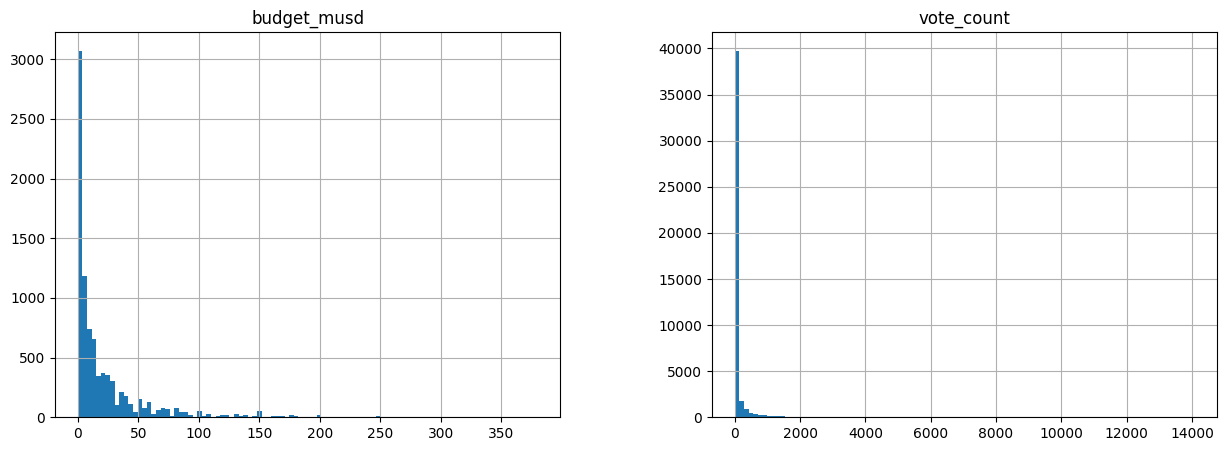

In [55]:
# The original dataframe data
df[['budget_musd', 'vote_count']].hist(figsize = (15, 5), bins = 100)
plt.show()


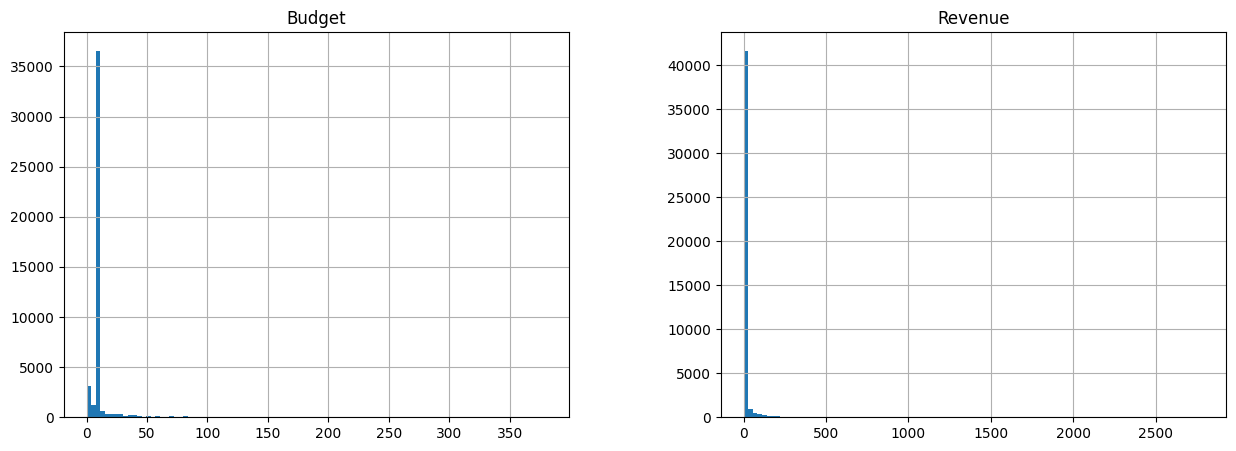

In [56]:
# for comparison
target_columns_df[['Budget', 'Revenue']].hist(figsize = (15, 5), bins = 100)
plt.show()

In [57]:
target_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Poster Path     44467 non-null  object        
 1   Budget          44691 non-null  float64       
 2   Revenue         44691 non-null  float64       
 3   Votes           44691 non-null  float64       
 4   Average Rating  44691 non-null  float64       
 5   Popularity      44691 non-null  float64       
 6   Released        44657 non-null  datetime64[ns]
 7   Profit          44691 non-null  float64       
 8   ROI             44691 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 3.4+ MB


## BEST AND WORSE MOVIES FUNCTION

In [58]:
def movie_filter(
    df: pd.DataFrame,
    number_of_results: int,
    sort_by: str,
    ascending: bool = False,
    min_budget: int = 0,
    min_votes: int = 0,
) -> str:
    """
    Filters movies from a given DataFrame based on minimum budget and votes, then sorts the results.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing movie data.
    number_of_results (int): The number of results to return.
    sort_by (str): The column to sort by.
    ascending (bool, optional): Whether to sort in ascending or descending order. Defaults to False.
    min_budget (int, optional): The minimum budget (in million dollars) required for a movie to be considered. Defaults to 0.
    min_votes (int, optional): The minimum number of votes required for a movie to be considered. Defaults to 0.
    
    Returns:
    str: An HTML table as a string representing the filtered and sorted movie data.

    Example:
    --------
    Assuming you have a DataFrame named 'df_movies' with columns 'Title', 'Budget', 'Votes', and 'Rating',
    you can use the function as follows to get the top 5 movies with at least $50 million budget and 1000 votes,
    sorted by rating in descending order:

    html_result = movie_filter(df_movies, 5, 'Rating', False, 50, 1000)
    display(HTML(html_result))
    """
    
    if not isinstance(df, pd.DataFrame):
        raise ValueError("df must be a pandas DataFrame.")
    if sort_by not in df.columns:
        raise ValueError(f"sort_by column '{sort_by}' not found in dataframe.")

    filtered_df = (
        df.loc[(df['Budget'] >= min_budget) & (df['Votes'] >= min_votes)]
        .sort_values(by=sort_by, ascending=ascending)
        .head(number_of_results)
    )

    return HTML(filtered_df.to_html(escape=False))



## The best and the worst movies... (Part 2)

__Movies Top 5 - Highest Revenue__

In [59]:
# Filter by highest revenue.
movie_filter(
    target_columns_df,10, 'Revenue', False, 5, 5
)


In [60]:
# Filter by highest budget.

movie_filter(
    target_columns_df,10, 'Budget', False, 5, 5
)


__Movies Top 5 - Highest Profit__

In [61]:
# Highest Profit.
movie_filter(
    target_columns_df,10, 'Profit', False, 5, 5
)

__Movies Top 5 - Lowest Profit__

In [62]:
# Lowest Profit.
movie_filter(
    target_columns_df,10, 'Profit', True, 5, 5
)

__Movies Top 5 - Highest ROI__

In [63]:
# Highest ROI.

movie_filter(
    target_columns_df,10, 'ROI', False, 5, 5
)

__Movies Top 5 - Lowest ROI__

In [64]:
# Lowest ROI.

movie_filter(
    target_columns_df,10, 'ROI', True, 5, 5
)

__Movies Top 5 - Most Votes__

In [65]:
# Most Votes.

movie_filter(
    target_columns_df,10, 'Votes', False, 5, 5
)

__Movies Top 5 - Highest Rating__

In [66]:
# Highest Rating, no less than 100 votes.

movie_filter(
    target_columns_df,10, 'Average Rating', False, 5, 100
)

__Movies Top 5 - Lowest Rating__

In [67]:
# Lowest Rating, no less than 100 votes.

movie_filter(
    target_columns_df,10, 'Average Rating', True, 5, 100
)

__Movies Top 5 - Most Popular__

In [68]:
# Most Popular, no less than 100 votes.

movie_filter(
    target_columns_df,10, 'Votes', False, 5, 100
)

## Find your next Movie

__Search 1: Science Fiction Action Movie with Bruce Willis (high Rating)__

In [69]:
df.genres[0]

'Animation|Comedy|Family'

In [70]:
mask_genres = df.genres.str.contains("Action") & df.genres.str.contains("Science Fiction")
mask_genres

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: genres, Length: 44691, dtype: bool

In [71]:
df.cast[0]

'Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette'

In [72]:
mask_actor = df.cast.str.contains("Bruce Willis")
mask_actor

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690      NaN
Name: cast, Length: 44691, dtype: object

In [73]:
df.loc[mask_actor & mask_genres, ["title", "vote_average"]].sort_values(by = "vote_average", 
                                                                        ascending = False)

title  vote_average
1448       The Fifth Element          7.30
19218                 Looper          6.60
1786              Armageddon          6.50
14135             Surrogates          5.90
20333  G.I. Joe: Retaliation          5.40
27619                   Vice          4.10

In [74]:
bruce = df.loc[mask_actor & mask_genres, ["title", "poster_path", "vote_average"]].sort_values(by = "vote_average", ascending = False).set_index("title")

In [75]:
HTML(bruce.to_html(escape=False))

__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (low runtime)__

In [76]:
df.director

0           John Lasseter
1            Joe Johnston
2           Howard Deutch
3         Forest Whitaker
4           Charles Shyer
               ...       
44686    Hamid Nematollah
44687            Lav Diaz
44688      Mark L. Lester
44689    Yakov Protazanov
44690       Daisy Asquith
Name: director, Length: 44691, dtype: object

In [77]:
mask_director = df.director == "Quentin Tarantino"

In [78]:
mask_actor = df.cast.str.contains("Uma Thurman")

In [79]:
quentin = df.loc[mask_director & mask_actor, 
               ["title", "poster_path", "runtime"]].sort_values(by = "runtime").set_index("title")

In [80]:
HTML(quentin.to_html(escape=False))

__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (high Revenue)__

In [81]:
df.production_companies[1]

'TriStar Pictures|Teitler Film|Interscope Communications'

In [82]:
mask_studio = df.production_companies.str.contains("Pixar").fillna(False)

In [83]:
df.release_date

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
44686          NaT
44687   2011-11-17
44688   2003-08-01
44689   1917-10-21
44690   2017-06-09
Name: release_date, Length: 44691, dtype: datetime64[ns]

In [84]:
mask_time = df.release_date.between("2010-01-01", "2015-12-31")

In [85]:
pixar = df.loc[mask_studio & mask_time, 
               ["title", "poster_path", "revenue_musd", "release_date"]].sort_values(by = "revenue_musd", ascending = False).set_index("title")

In [86]:
HTML(pixar.to_html(escape=False))

__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent)__

In [87]:
mask_genre = df.genres.str.contains("Action") | df.genres.str.contains("Thriller")

In [88]:
mask_lan = df.original_language == "en"

In [89]:
mask_vote_av = df.vote_average >= 7.5 

In [90]:
mask_vote_co = df.vote_count >= 10

In [91]:
next_mov = df.loc[mask_genre & mask_lan & mask_vote_av & mask_vote_co, 
               ["title", "poster_path", "genres", "vote_average", "vote_count", "release_date"]].sort_values(by = "release_date", ascending = False).set_index("title").head(20)

In [92]:
HTML(next_mov.to_html(escape=False))

## What are the most common Words in Movie Titles and Taglines?

In [94]:
df

id                        title  \
0         862                    Toy Story   
1        8844                      Jumanji   
2       15602             Grumpier Old Men   
3       31357            Waiting to Exhale   
4       11862  Father of the Bride Part II   
...       ...                          ...   
44686  439050                       Subdue   
44687  111109          Century of Birthing   
44688   67758                     Betrayal   
44689  227506             Satan Triumphant   
44690  461257                     Queerama   

                                                                              tagline  \
0                                                                                 NaN   
1                                           Roll the dice and unleash the excitement!   
2                                Still Yelling. Still Fighting. Still Ready for Love.   
3      Friends are the people who let you be yourself... and never let you forget it.   
4      Just When His World Is Back To Normal... He's In For The Surprise Of His Life!   
...                                                                               ...   
44686                                      Rising and falling between a man and woman   
44687                                                                             NaN   
44688                                                          A deadly game of wits.   
44689                                                                             NaN   
44690                                                                             NaN   

      release_date                    genres           belongs_to_collection  \
0       1995-10-30   Animation|Comedy|Family            Toy Story Collection   
1       1995-12-15  Adventure|Fantasy|Family                             NaN   
2       1995-12-22            Romance|Comedy       Grumpy Old Men Collection   
3       1995-12-22      Comedy|Drama|Romance                             NaN   
4       1995-02-10                    Comedy  Father of the Bride Collection   
...            ...                       ...                             ...   
44686          NaT              Drama|Family                             NaN   
44687   2011-11-17                     Drama                             NaN   
44688   2003-08-01     Action|Drama|Thriller                             NaN   
44689   1917-10-21                       NaN                             NaN   
44690   2017-06-09                       NaN                             NaN   

      original_language  budget_musd  revenue_musd  \
0                    en        30.00        373.55   
1                    en        65.00        262.80   
2                    en          NaN           NaN   
3                    en        16.00         81.45   
4                    en          NaN         76.58   
...                 ...          ...           ...   
44686                fa          NaN           NaN   
44687                tl          NaN           NaN   
44688                en          NaN           NaN   
44689                en          NaN           NaN   
44690                en          NaN           NaN   

                                          production_companies  \
0                                      Pixar Animation Studios   
1      TriStar Pictures|Teitler Film|Interscope Communications   
2                                  Warner Bros.|Lancaster Gate   
3                       Twentieth Century Fox Film Corporation   
4                    Sandollar Productions|Touchstone Pictures   
...                                                        ...   
44686                                                      NaN   
44687                                              Sine Olivia   
44688                                  American World Pictures   
44689                                                Yermoliev   
44690                                                

In [95]:
# movie tagline
df.tagline[1]

'Roll the dice and unleash the excitement!'

In [96]:
# movie overview
df.overview[1]

"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures."

In [97]:
# Dropping these taglines won't affect any data. But we will keep it in `title` and then create a new title column.
title = df.title.dropna()
overview = df.overview.dropna()
tagline = df.tagline.dropna()

In [98]:
title

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
44686                         Subdue
44687            Century of Birthing
44688                       Betrayal
44689               Satan Triumphant
44690                       Queerama
Name: title, Length: 44691, dtype: object

In [99]:
' '.join(title)

'Toy Story Jumanji Grumpier Old Men Waiting to Exhale Father of the Bride Part II Heat Sabrina Tom and Huck Sudden Death GoldenEye The American President Dracula: Dead and Loving It Balto Nixon Cutthroat Island Casino Sense and Sensibility Four Rooms Ace Ventura: When Nature Calls Money Train Get Shorty Copycat Assassins Powder Leaving Las Vegas Othello Now and Then Persuasion The City of Lost Children Shanghai Triad Dangerous Minds Twelve Monkeys Wings of Courage Babe Carrington Dead Man Walking Across the Sea of Time It Takes Two Clueless Cry, the Beloved Country Richard III Dead Presidents Restoration Mortal Kombat To Die For How To Make An American Quilt Se7en Pocahontas When Night Is Falling The Usual Suspects Guardian Angel Mighty Aphrodite Lamerica The Big Green Georgia Kids of the Round Table Home for the Holidays The Postman The Confessional The Indian in the Cupboard Eye for an Eye Mr. Holland\'s Opus Don\'t Be a Menace to South Central While Drinking Your Juice in the Hood T

In [100]:
title_corpus = ' '.join(title)
overview_corpus = ' '.join(overview)
tagline_corpus = ' '.join(tagline)

In [101]:
tagline_corpus

'Roll the dice and unleash the excitement! Still Yelling. Still Fighting. Still Ready for Love. Friends are the people who let you be yourself... and never let you forget it. Just When His World Is Back To Normal... He\'s In For The Surprise Of His Life! A Los Angeles Crime Saga You are cordially invited to the most surprising merger of the year. The Original Bad Boys. Terror goes into overtime. No limits. No fears. No substitutes. Why can\'t the most powerful man in the world have the one thing he wants most? Part Dog. Part Wolf. All Hero. Triumphant in Victory, Bitter in Defeat. He Changed the World, But Lost a Nation. The Course Has Been Set. There Is No Turning Back. Prepare Your Weapons. Summon Your Courage. Discover the Adventure of a Lifetime! No one stays at the top forever. Lose your heart and come to your senses. Twelve outrageous guests. Four scandalous requests. And one lone bellhop, in his first day on the job, who\'s in for the wildest New year\'s Eve of his life. New ani

In [102]:
title_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words= 200).generate(title_corpus)
title_wordcloud

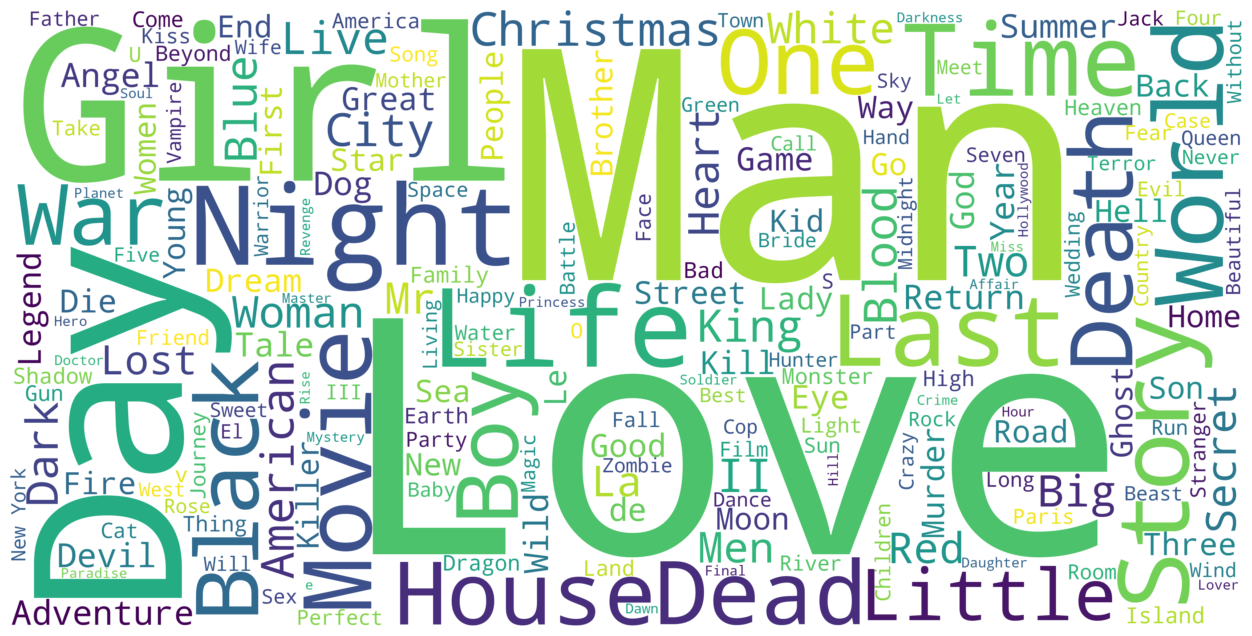

In [103]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

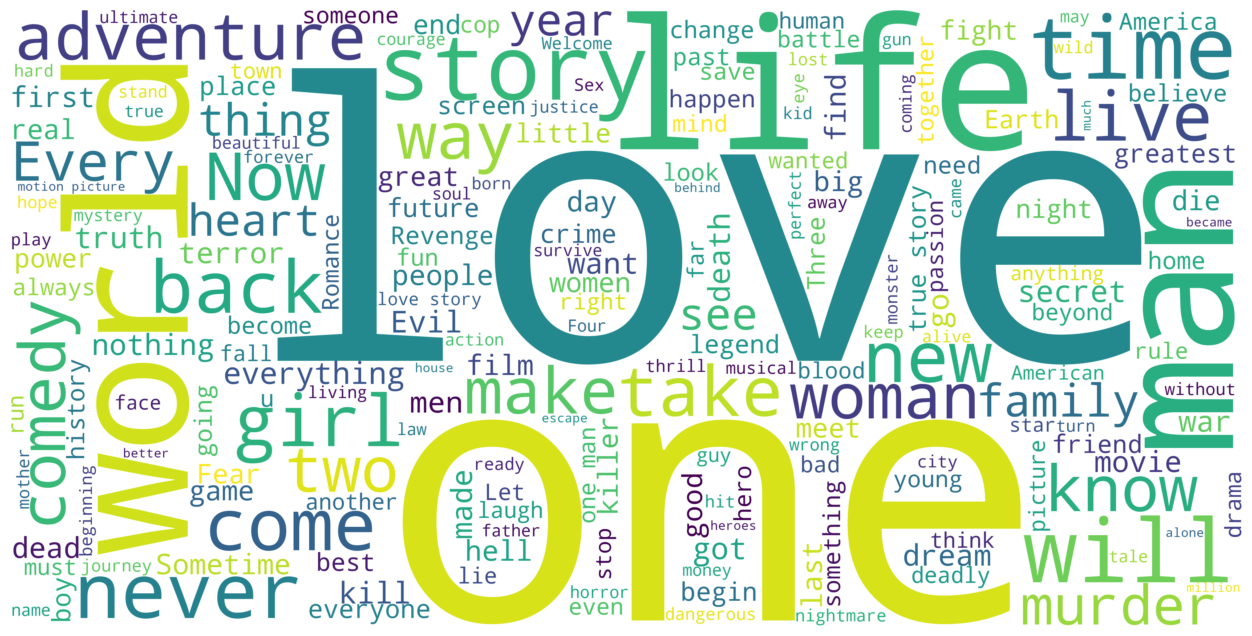

In [105]:
tagline_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate(tagline_corpus)
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

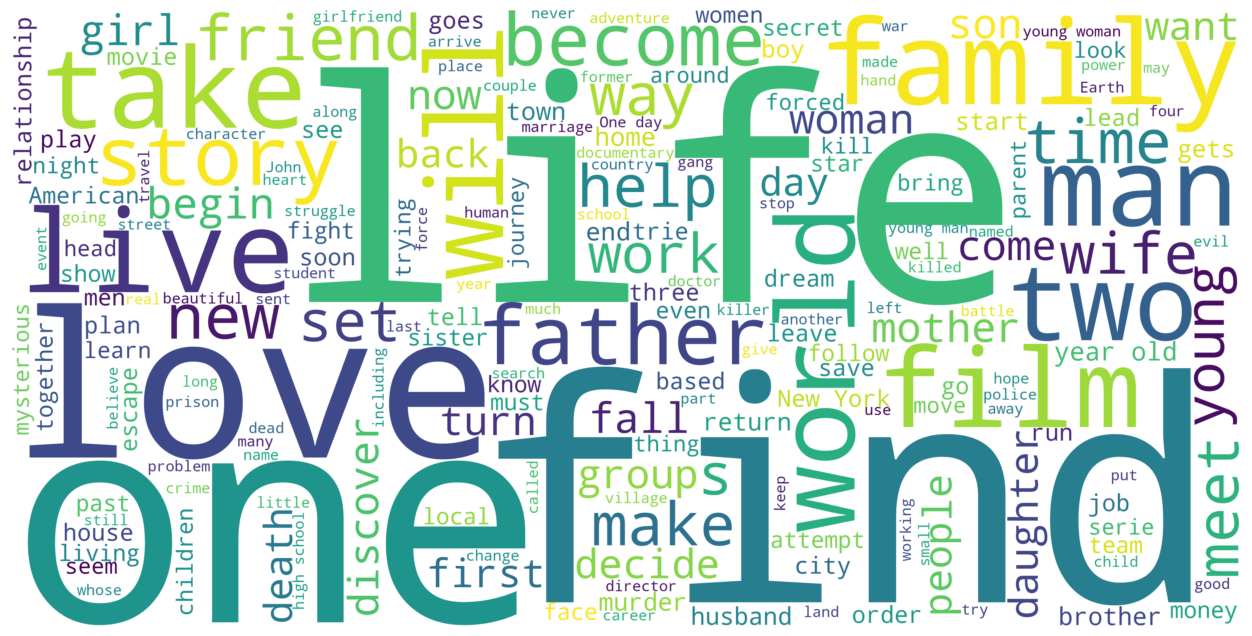

In [106]:
overview_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

## Are Franchises more successful?

In [107]:
df.belongs_to_collection

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
44686                               NaN
44687                               NaN
44688                               NaN
44689                               NaN
44690                               NaN
Name: belongs_to_collection, Length: 44691, dtype: object

In [108]:
df["Franchise"] = df.belongs_to_collection.notna()

In [109]:
df.Franchise

0         True
1        False
2         True
3        False
4         True
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: Franchise, Length: 44691, dtype: bool

In [110]:
df.Franchise.value_counts()

Franchise
False    40228
True      4463
Name: count, dtype: int64

__Franchise vs. Stand-alone: Average Revenue__

In [111]:
df.groupby("Franchise").revenue_musd.mean()

Franchise
False    44.74
True    165.71
Name: revenue_musd, dtype: float64

__Franchise vs. Stand-alone: Return on Investment / Profitability__

In [112]:
df["ROI"] = df.revenue_musd.div(df.budget_musd)

In [113]:
df.groupby("Franchise").ROI.median()

Franchise
False   1.62
True    3.71
Name: ROI, dtype: float64

What this is saying is that the Franchise is more successful than the Stand-alone. A Franchise movie return 3.71 times on investment vs. the non-franchise movie returns 1.62 times on profitability.

__Franchise vs. Stand-alone: Average Budget__

In [114]:
df.groupby("Franchise").budget_musd.mean()

Franchise
False   18.05
True    38.32
Name: budget_musd, dtype: float64

So a franchise is generally more profitable, however, the budget for franchise movies is 38.32 million vs only an average of 18 million for a non-franchise movie.

__Franchise vs. Stand-alone: Average Popularity__

In [115]:
df.groupby("Franchise").popularity.mean()

Franchise
False   2.59
True    6.25
Name: popularity, dtype: float64

IMDB gives a popularity score to all movies so the average popularity of a francise movie is 6.25 vs. only 2.6 for a non-franchise movie.

__Franchise vs. Stand-alone: Average Rating__

In [116]:
df.groupby("Franchise").vote_average.mean()

Franchise
False   6.01
True    5.96
Name: vote_average, dtype: float64

In [117]:
df.groupby("Franchise").agg({"budget_musd": "mean", "revenue_musd": "mean", "vote_average": "mean",
                            "popularity": "mean", "ROI":"median", "vote_count":"mean"})

budget_musd  revenue_musd  vote_average  popularity  ROI  \
Franchise                                                             
False            18.05         44.74          6.01        2.59 1.62   
True             38.32        165.71          5.96        6.25 3.71   

           vote_count  
Franchise              
False           78.29  
True           412.39

## Most Successful Franchises

In [118]:
df.belongs_to_collection

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
44686                               NaN
44687                               NaN
44688                               NaN
44689                               NaN
44690                               NaN
Name: belongs_to_collection, Length: 44691, dtype: object

In [119]:
df.belongs_to_collection.value_counts()

belongs_to_collection
The Bowery Boys                  29
Totò Collection                  27
Zatôichi: The Blind Swordsman    26
James Bond Collection            26
The Carry On Collection          25
                                 ..
Salt and Pepper Collection        1
Deadpool Collection               1
Ant-Man Collection                1
Elvira Collection                 1
Red Lotus Collection              1
Name: count, Length: 1691, dtype: int64

In [120]:
franchises = df.groupby("belongs_to_collection").agg({"title":"count", "budget_musd": ["sum", "mean"], 
                                                      "revenue_musd": ["sum", "mean"],
                                                      "vote_average": "mean", "popularity": "mean",
                                                      "ROI":"median", 
                                                      "vote_count":"mean"})

In [121]:
franchises

title budget_musd       revenue_musd  \
                                     count         sum  mean          sum   
belongs_to_collection                                                       
... Has Fallen Collection                2      130.00 65.00       366.78   
00 Schneider Filmreihe                   1        0.00   NaN         0.00   
08/15 Collection                         1        0.00   NaN         0.00   
100 Girls Collection                     2        0.00   NaN         0.00   
101 Dalmatians (Animated) Collection     2        4.00  4.00       215.88   
...                                    ...         ...   ...          ...   
Сказки Чуковского                        1        0.00   NaN         0.00   
Чебурашка и крокодил Гена                1        0.00   NaN         0.00   
Что Творят мужчины! (Коллекция)          2        2.00  2.00         0.00   
男はつらいよ シリーズ                              3        0.00   NaN         0.00   
식객 시리즈                                   2        0.00   NaN         0.00   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
... Has Fallen Collection            183.39         6.00      13.01   2.86   
00 Schneider Filmreihe                  NaN         6.50       1.93    NaN   
08/15 Collection                        NaN         5.90       0.63    NaN   
100 Girls Collection                    NaN         5.15       3.08    NaN   
101 Dalmatians (Animated) Collection 215.88         6.25      13.06  53.97   
...                                     ...          ...        ...    ...   
Сказки Чуковского                       NaN         3.00       0.73    NaN   
Чебурашка и крокодил Гена               NaN         6.70       0.88    NaN   
Что Творят мужчины! (Коллекция)         NaN         3.15       1.30    NaN   
男はつらいよ シリーズ                             NaN         7.00       0.04    NaN   
식객 시리즈                                  NaN         4.95       0.16    NaN   

                                     vote_count  
                                           mean  
belongs_to_collection                            
... Has Fallen Collection               2333.00  
00 Schneider Filmreihe                    16.00  
08/15 Collection                           4.00  
100 Girls Collection                      64.00  
101 Dalmatians (Animated) Collection     937.00  
...                                         ...  
Сказки Чуковского                          3.00  
Чебурашка и крокодил Гена                  7.00  
Что Творят мужчины! (Коллекция)            5.50  
男はつらいよ シリーズ                                0.67  
식객 시리즈                                     3.50  

[1691 rows x 9 columns]

In [122]:
franchises.nlargest(20, ("title", "count"))

title budget_musd       revenue_musd  \
                                       count         sum  mean          sum   
belongs_to_collection                                                         
The Bowery Boys                           29        0.00   NaN         0.00   
Totò Collection                           27        0.00   NaN         0.00   
James Bond Collection                     26     1539.65 59.22      7106.97   
Zatôichi: The Blind Swordsman             26        0.00   NaN         0.00   
The Carry On Collection                   25        0.00   NaN         0.00   
Charlie Chan (Sidney Toler) Collection    21        0.00   NaN         0.00   
Pokémon Collection                        20      250.72 50.14       601.87   
Godzilla (Showa) Collection               16        2.81  0.56         0.00   
Charlie Chan (Warner Oland) Collection    15        0.00   NaN         0.00   
Dragon Ball Z (Movie) Collection          15        5.00  5.00       112.12   
Uuno Turhapuro                            15        0.00   NaN         0.00   
Monster High Collection                   14        0.50  0.50         0.00   
The Land Before Time Collection           14       12.30 12.30        84.46   
George Carlin Comedy Collection           13        0.00   NaN         0.00   
Sharpe Collection                         13        0.00   NaN         0.00   
Friday the 13th Collection                12       84.40  7.03       464.90   
Johan Falk GSI Collection                 12        0.00   NaN         0.00   
Sherlock Holmes (1939 series)             12        0.00   NaN         0.00   
The Amityville Horror Collection          12       21.02  5.25       213.35   
An American Girl Collection               10        6.80  6.80         0.00   

                                              vote_average popularity    ROI  \
                                         mean         mean       mean median   
belongs_to_collection                                                          
The Bowery Boys                           NaN         6.67       0.20    NaN   
Totò Collection                           NaN         6.84       1.05    NaN   
James Bond Collection                  273.35         6.34      13.45   6.13   
Zatôichi: The Blind Swordsman             NaN         6.40       1.10    NaN   
The Carry On Collection                   NaN         6.17       3.22    NaN   
Charlie Chan (Sidney Toler) Collection    NaN         6.61       0.63    NaN   
Pokémon Collection                      66.87         6.05       4.37   4.46   
Godzilla (Showa) Collection               NaN         5.97       3.42    NaN   
Charlie Chan (Warner Oland) Collection    NaN         6.66       0.66    NaN   
Dragon Ball Z (Movie) Collection        56.06         6.61       6.18  12.35   
Uuno Turhapuro                            NaN         5.53       0.17    NaN   
Monster High Collection                   NaN         6.49       3.59    NaN   
The Land Before Time Collection         84.46         6.16       4.91   6.87   
George Carlin Comedy Collection           NaN         7.47       1.30    NaN   
Sharpe Collection                         NaN         6.74       1.71    NaN   
Friday the 13th Collection              38.74         5.42       9.76   6.67   
Johan Falk GSI Collection                 NaN         6.50       1.52    NaN   
Sherlock Holmes (1939 series)             NaN         6.92       2.88    NaN   
The Amityville Horror Collection        53.34         4.36       7.18   5.69   
An American Girl Collection               NaN         5.25       1.94    NaN   

                                       vote_count  
                                             mean  
belongs_to_collection                              
The Bowery Boys                              0.72  
Totò Collection                             18.04  
James Bond Collection                     1284.31  
Zatôichi: The Blind Swordsman               11.19  
The Carry On Col

In [123]:
franchises.nlargest(20, ("revenue_musd", "mean"))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
Avatar Collection                       1      237.00 237.00      2787.97   
The Avengers Collection                 2      500.00 250.00      2924.96   
Frozen Collection                       2      150.00 150.00      1274.22   
Finding Nemo Collection                 2      294.00 147.00      1968.91   
The Hobbit Collection                   3      750.00 250.00      2935.52   
The Lord of the Rings Collection        3      266.00  88.67      2916.54   
Harry Potter Collection                 8     1280.00 160.00      7707.37   
Star Wars Collection                    8      854.35 106.79      7434.49   
Despicable Me Collection                6      299.00  74.75      3691.07   
Pirates of the Caribbean Collection     5     1250.00 250.00      4521.58   
The Secret Life of Pets Collection      1       75.00  75.00       875.46   
Transformers Collection                 5      965.00 193.00      4366.10   
Spider-Man Collection                   3      597.00 199.00      2496.35   
The Dark Knight Collection              3      585.00 195.00      2463.72   
Wonder Woman Collection                 1      149.00 149.00       820.58   
Guardians of the Galaxy Collection      2      370.00 185.00      1636.74   
Fantastic Beasts Collection             1      180.00 180.00       809.34   
Iron Man Collection                     3      540.00 180.00      2424.55   
The Lion King Collection                4       45.00  45.00       788.24   
Deadpool Collection                     1       58.00  58.00       783.11   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
Avatar Collection                   2787.97         7.20     185.07  11.76   
The Avengers Collection             1462.48         7.35      63.63   5.96   
Frozen Collection                   1274.22         7.10      16.88   8.49   
Finding Nemo Collection              984.45         7.20      19.99   7.57   
The Hobbit Collection                978.51         7.23      25.21   3.83   
The Lord of the Rings Collection     972.18         8.03      30.27  11.73   
Harry Potter Collection              963.42         7.54      26.25   6.17   
Star Wars Collection                 929.31         7.38      23.41   8.24   
Despicable Me Collection             922.77         6.78     106.72  12.76   
Pirates of the Caribbean Collection  904.32         6.88      53.97   3.45   
The Secret Life of Pets Collection   875.46         5.90      11.01  11.67   
Transformers Collection              873.22         6.14      14.43   5.20   
Spider-Man Collection                832.12         6.47      22.62   3.92   
The Dark Knight Collection           821.24         7.80      57.42   4.34   
Wonder Woman Collection              820.58         7.20     294.34   5.51   
Guardians of the Galaxy Collection   818.37         7.75     119.31   4.43   
Fantastic Beasts Collection          809.34         7.20      41.05   4.50   
Iron Man Collection                  808.18         6.93      21.63   4.18   
The Lion King Collection             788.24         6.75      11.48  17.52   
Deadpool Collection                  783.11         7.40     187.86  13.50   

                                    vote_count  
                                          mean  
belongs_to_collection                           
Avatar Collection                     12114.00  
The Avengers Collection                9454.00  
Frozen Collection                      3035.00  
Finding Nemo Collection                5312.50  
The Hobbit Collection                  5981.33  
The Lord of the Rings Collection       8253.00  
Harry Potter Collection     

In [124]:
franchises.nlargest(20, ("budget_musd", "mean"))

title budget_musd        revenue_musd  \
                                        count         sum   mean          sum   
belongs_to_collection                                                           
Tangled Collection                          2      260.00 260.00       591.79   
Pirates of the Caribbean Collection         5     1250.00 250.00      4521.58   
The Avengers Collection                     2      500.00 250.00      2924.96   
The Hobbit Collection                       3      750.00 250.00      2935.52   
Man of Steel Collection                     2      475.00 237.50      1536.11   
Avatar Collection                           1      237.00 237.00      2787.97   
The Amazing Spider-Man Collection           2      415.00 207.50      1457.93   
World War Z Collection                      1      200.00 200.00       531.87   
Spider-Man Collection                       3      597.00 199.00      2496.35   
The Dark Knight Collection                  3      585.00 195.00      2463.72   
Transformers Collection                     5      965.00 193.00      4366.10   
Captain America Collection                  3      560.00 186.67      2238.64   
The Chronicles of Narnia Collection         3      560.00 186.67      1584.14   
Alice in Wonderland Collection              2      370.00 185.00      1324.86   
Guardians of the Galaxy Collection          2      370.00 185.00      1636.74   
Fantastic Beasts Collection                 1      180.00 180.00       809.34   
Iron Man Collection                         3      540.00 180.00      2424.55   
Pacific Rim Collection                      1      180.00 180.00       407.60   
Star Trek: Alternate Reality Collection     3      525.00 175.00      1196.52   
Cars Collection                             3      495.00 165.00      1372.01   

                                                vote_average popularity  \
                                           mean         mean       mean   
belongs_to_collection                                                     
Tangled Collection                       591.79         7.25      12.32   
Pirates of the Caribbean Collection      904.32         6.88      53.97   
The Avengers Collection                 1462.48         7.35      63.63   
The Hobbit Collection                    978.51         7.23      25.21   
Man of Steel Collection                  768.05         6.10      24.99   
Avatar Collection                       2787.97         7.20     185.07   
The Amazing Spider-Man Collection        728.97         6.50      28.67   
World War Z Collection                   531.87         6.70      26.11   
Spider-Man Collection                    832.12         6.47      22.62   
The Dark Knight Collection               821.24         7.80      57.42   
Transformers Collection                  873.22         6.14      14.43   
Captain America Collection               746.21         7.10      61.31   
The Chronicles of Narnia Collection      528.05         6.40      14.34   
Alice in Wonderland Collection           662.43         6.45      15.95   
Guardians of the Galaxy Collection       818.37         7.75     119.31   
Fantastic Beasts Collection              809.34         7.20      41.05   
Iron Man Collection                      808.18         6.93      21.63   
Pacific Rim Collection                   407.60         6.70      33.95   
Star Trek: Alternate Reality Collection  398.84         7.13      17.27   
Cars Collection                          457.34         6.33      17.25   

                                           ROI vote_count  
                                        median       mean  
belongs_to_collection                                      
Tangled Collection                        2.28    1901.00  
Pirates of the Caribbean Collection       3.45    5016.00  
The Avengers Collection                   5.96    9454.00  
The Hobbit Collection                     3.83    5981.33  
Man of Steel Collection       

In [125]:
franchises[franchises[("vote_count", "mean")] >=1000].nlargest(20, ("vote_average", "mean"))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
The Lord of the Rings Collection        3      266.00  88.67      2916.54   
The Godfather Collection                3       73.00  24.33       429.38   
Blade Runner Collection                 1       28.00  28.00        33.14   
The Man With No Name Collection         3        2.00   0.67        35.50   
The Dark Knight Collection              3      585.00 195.00      2463.72   
Guardians of the Galaxy Collection      2      370.00 185.00      1636.74   
Kill Bill Collection                    2       60.00  30.00       333.11   
Kingsman Collection                     1       81.00  81.00       414.35   
How to Train Your Dragon Collection     2      310.00 155.00      1104.00   
Harry Potter Collection                 8     1280.00 160.00      7707.37   
Toy Story Collection                    3      320.00 106.67      1937.89   
Back to the Future Collection           3       99.00  33.00       957.64   
Trainspotting Collection                2       22.00  11.00        57.90   
Deadpool Collection                     1       58.00  58.00       783.11   
The Incredibles Collection              1       92.00  92.00       631.44   
Star Wars Collection                    8      854.35 106.79      7434.49   
The Avengers Collection                 2      500.00 250.00      2924.96   
The Lego Movie Collection               2      140.00  70.00       781.11   
Tangled Collection                      2      260.00 260.00       591.79   
The Space Odyssey Series                2       38.50  19.25       109.10   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
The Lord of the Rings Collection     972.18         8.03      30.27  11.73   
The Godfather Collection             143.13         7.97      31.64   3.66   
Blade Runner Collection               33.14         7.90      96.27   1.18   
The Man With No Name Collection       11.83         7.83      14.17  25.00   
The Dark Knight Collection           821.24         7.80      57.42   4.34   
Guardians of the Galaxy Collection   818.37         7.75     119.31   4.43   
Kill Bill Collection                 166.55         7.70      23.40   5.55   
Kingsman Collection                  414.35         7.60      28.22   5.12   
How to Train Your Dragon Collection  552.00         7.55      13.34   3.60   
Harry Potter Collection              963.42         7.54      26.25   6.17   
Toy Story Collection                 645.96         7.53      18.82   5.53   
Back to the Future Collection        319.21         7.50      17.50   8.30   
Trainspotting Collection              28.95         7.45      18.50   3.21   
Deadpool Collection                  783.11         7.40     187.86  13.50   
The Incredibles Collection           631.44         7.40      22.22   6.86   
Star Wars Collection                 929.31         7.38      23.41   8.24   
The Avengers Collection             1462.48         7.35      63.63   5.96   
The Lego Movie Collection            390.56         7.35      16.74   5.86   
Tangled Collection                   591.79         7.25      12.32   2.28   
The Space Odyssey Series              54.55         7.25      14.99   3.99   

                                    vote_count  
                                          mean  
belongs_to_collection                           
The Lord of the Rings Collection       8253.00  
The Godfather Collection               3677.00  
Blade Runner Collection                3833.00  
The Man With No Name Collection        1422.67  
The Dark Knight Collection             9681.00  
Guardians of the Galaxy Collection     7436.00  
Kill Bill Collection        

## Most Successful Directors

In [126]:
df.director

0           John Lasseter
1            Joe Johnston
2           Howard Deutch
3         Forest Whitaker
4           Charles Shyer
               ...       
44686    Hamid Nematollah
44687            Lav Diaz
44688      Mark L. Lester
44689    Yakov Protazanov
44690       Daisy Asquith
Name: director, Length: 44691, dtype: object

In [127]:
df.director.value_counts().head(20)

director
John Ford             66
Michael Curtiz        65
Werner Herzog         54
Alfred Hitchcock      53
Georges Méliès        49
Woody Allen           49
Jean-Luc Godard       46
Sidney Lumet          46
Charlie Chaplin       44
Raoul Walsh           43
William A. Wellman    42
Henry Hathaway        41
Richard Thorpe        40
Ingmar Bergman        39
Martin Scorsese       39
Fritz Lang            38
John Huston           38
George Cukor          38
Mervyn LeRoy          37
Robert Altman         37
Name: count, dtype: int64

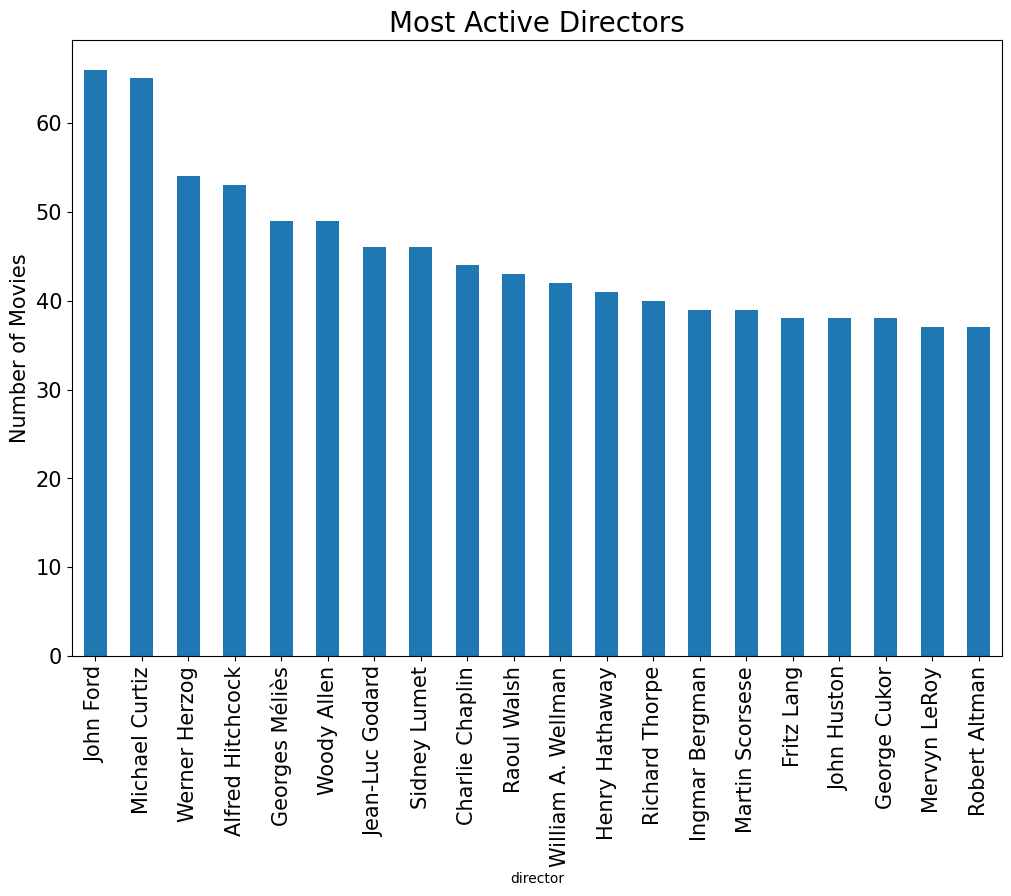

In [128]:
plt.figure(figsize = (12, 8))
df.director.value_counts().head(20).plot(kind='bar', fontsize = 15)
plt.title("Most Active Directors",fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()

In [129]:
df.groupby("director").revenue_musd.sum().nlargest(20)

director
Steven Spielberg    9256.62
Peter Jackson       6528.24
Michael Bay         6437.47
James Cameron       5900.61
David Yates         5334.56
Christopher Nolan   4747.41
Robert Zemeckis     4138.23
Tim Burton          4032.92
Ridley Scott        3917.53
Chris Columbus      3866.84
Roland Emmerich     3798.40
Ron Howard          3714.15
J.J. Abrams         3579.22
Gore Verbinski      3575.34
George Lucas        3341.55
Sam Raimi           3193.79
Francis Lawrence    3183.34
Clint Eastwood      3100.68
Bill Condon         3017.30
Joss Whedon         2963.83
Name: revenue_musd, dtype: float64

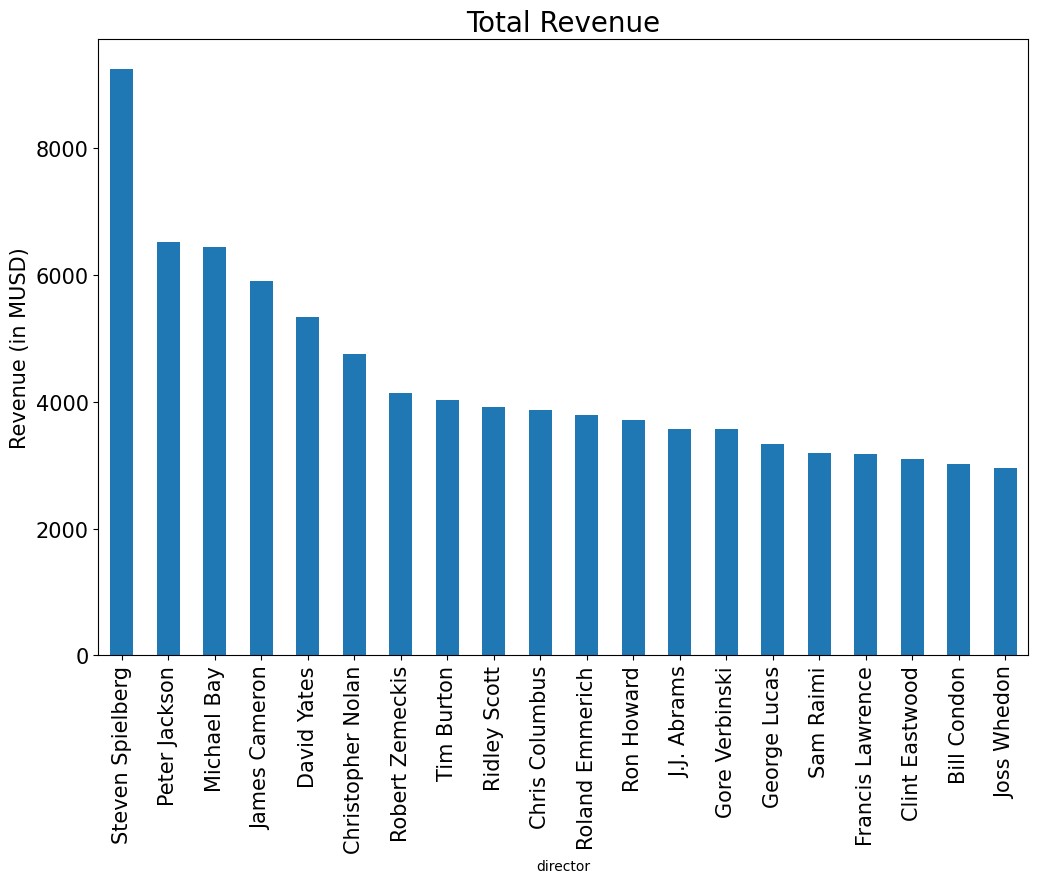

In [130]:
plt.figure(figsize = (12, 8))
df.groupby("director").revenue_musd.sum().nlargest(20).plot(kind='bar', fontsize = 15)
plt.title("Total Revenue",fontsize = 20)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.show()

In [131]:
directors = df.groupby("director").agg({"title": "count", "vote_average" :"mean", "vote_count": "sum"})

In [132]:
directors

title  vote_average  vote_count
director                                            
 Dale Trevillion\t       2          4.00        4.00
 Davide Manuli           1          6.90       10.00
 E.W. Swackhamer         1          5.90        5.00
 Vitaliy Vorobyov        1          5.50        3.00
 Yeon Sang-Ho            4          6.60     1039.00
...                    ...           ...         ...
Ярополк Лапшин           1         10.00        1.00
پیمان معادی              1          6.00        2.00
塩谷 直義                    1          7.20       40.00
杰森·莫玛                    1          5.80       28.00
진모영                      1          6.00        6.00

[17349 rows x 3 columns]

In [133]:
directors[(directors.vote_count >= 10000) & (directors.title >= 10)].nlargest(20, "vote_average")

title  vote_average  vote_count
director                                          
Hayao Miyazaki        14          7.70    14700.00
Christopher Nolan     11          7.62    67344.00
Quentin Tarantino     10          7.49    45910.00
Wes Anderson          10          7.37    11743.00
David Fincher         10          7.35    37588.00
Martin Scorsese       39          7.22    35541.00
Peter Jackson         13          7.14    47571.00
Joel Coen             17          7.02    18139.00
James Cameron         11          6.93    33736.00
Stanley Kubrick       16          6.91    18214.00
James Mangold         10          6.90    16607.00
Steven Spielberg      33          6.89    62266.00
Danny Boyle           14          6.87    16504.00
Guy Ritchie           10          6.80    19626.00
Robert Zemeckis       19          6.79    37666.00
Terry Gilliam         14          6.76    10049.00
Tim Burton            21          6.73    36922.00
John Lasseter         10          6.72    18337.00
Ang Lee               14          6.71    11164.00
Antoine Fuqua         12          6.71    15519.00

In [134]:
df.genres = df.genres.astype(str)

In [135]:
df.loc[df.genres.str.contains("Horror")].groupby("director").revenue_musd.sum().nlargest(20)

director
Paul W.S. Anderson    982.29
James Wan             861.31
Wes Craven            834.93
Francis Lawrence      816.23
Ridley Scott          689.00
Marc Forster          531.87
Steven Spielberg      500.10
William Friedkin      466.40
Darren Lynn Bousman   456.34
M. Night Shyamalan    375.37
Henry Joost           349.07
David R. Ellis        348.74
Adrian Lyne           346.11
James DeMonaco        316.70
Stephen Sommers       311.46
Gore Verbinski        275.91
Guillermo del Toro    261.63
John R. Leonetti      255.27
Fede Alvarez          254.64
Jordan Peele          252.43
Name: revenue_musd, dtype: float64

## Most Successful Actors (Part 1)

In [136]:
df.cast

0                                     Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette
1        Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyru...
2                                                                                                                 Walter Matthau|Jack Lemmon|Ann-Margret|Sophia Loren|Daryl Hannah|Burgess Meredith|Kevin Pollak
3                                                          Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Michael Beach|Mykelti Williamson|Lamont Johnson|Wesley Snipes
4                               Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGre

In [137]:
df

id                        title  \
0         862                    Toy Story   
1        8844                      Jumanji   
2       15602             Grumpier Old Men   
3       31357            Waiting to Exhale   
4       11862  Father of the Bride Part II   
...       ...                          ...   
44686  439050                       Subdue   
44687  111109          Century of Birthing   
44688   67758                     Betrayal   
44689  227506             Satan Triumphant   
44690  461257                     Queerama   

                                                                              tagline  \
0                                                                                 NaN   
1                                           Roll the dice and unleash the excitement!   
2                                Still Yelling. Still Fighting. Still Ready for Love.   
3      Friends are the people who let you be yourself... and never let you forget it.   
4      Just When His World Is Back To Normal... He's In For The Surprise Of His Life!   
...                                                                               ...   
44686                                      Rising and falling between a man and woman   
44687                                                                             NaN   
44688                                                          A deadly game of wits.   
44689                                                                             NaN   
44690                                                                             NaN   

      release_date                    genres           belongs_to_collection  \
0       1995-10-30   Animation|Comedy|Family            Toy Story Collection   
1       1995-12-15  Adventure|Fantasy|Family                             NaN   
2       1995-12-22            Romance|Comedy       Grumpy Old Men Collection   
3       1995-12-22      Comedy|Drama|Romance                             NaN   
4       1995-02-10                    Comedy  Father of the Bride Collection   
...            ...                       ...                             ...   
44686          NaT              Drama|Family                             NaN   
44687   2011-11-17                     Drama                             NaN   
44688   2003-08-01     Action|Drama|Thriller                             NaN   
44689   1917-10-21                       nan                             NaN   
44690   2017-06-09                       nan                             NaN   

      original_language  budget_musd  revenue_musd  \
0                    en        30.00        373.55   
1                    en        65.00        262.80   
2                    en          NaN           NaN   
3                    en        16.00         81.45   
4                    en          NaN         76.58   
...                 ...          ...           ...   
44686                fa          NaN           NaN   
44687                tl          NaN           NaN   
44688                en          NaN           NaN   
44689                en          NaN           NaN   
44690                en          NaN           NaN   

                                          production_companies  \
0                                      Pixar Animation Studios   
1      TriStar Pictures|Teitler Film|Interscope Communications   
2                                  Warner Bros.|Lancaster Gate   
3                       Twentieth Century Fox Film Corporation   
4                    Sandollar Productions|Touchstone Pictures   
...                                                        ...   
44686                                                      NaN   
44687                                              Sine Olivia   
44688                                  American World Pictures   
44689                                                Yermoliev   
44690                                                

In [138]:
df.set_index("id", inplace = True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, 862 to 461257
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  44691 non-null  object        
 1   tagline                20284 non-null  object        
 2   release_date           44657 non-null  datetime64[ns]
 3   genres                 44691 non-null  object        
 4   belongs_to_collection  4463 non-null   object        
 5   original_language      44681 non-null  object        
 6   budget_musd            8854 non-null   float64       
 7   revenue_musd           7385 non-null   float64       
 8   production_companies   33356 non-null  object        
 9   production_countries   38835 non-null  object        
 10  vote_count             44691 non-null  float64       
 11  vote_average           42077 non-null  float64       
 12  popularity             44691 non-null  float64       
 13  run

In [140]:
df.cast

id
862                                    Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette
8844      Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyru...
15602                                                                                                              Walter Matthau|Jack Lemmon|Ann-Margret|Sophia Loren|Daryl Hannah|Burgess Meredith|Kevin Pollak
31357                                                       Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Michael Beach|Mykelti Williamson|Lamont Johnson|Wesley Snipes
11862                            Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Ka

In [141]:
df.cast.str.split("|", expand = True)

0                  1               2    \
id                                                            
862            Tom Hanks          Tim Allen     Don Rickles   
8844      Robin Williams      Jonathan Hyde   Kirsten Dunst   
15602     Walter Matthau        Jack Lemmon     Ann-Margret   
31357    Whitney Houston     Angela Bassett  Loretta Devine   
11862       Steve Martin       Diane Keaton    Martin Short   
...                  ...                ...             ...   
439050      Leila Hatami     Kourosh Tahami     Elham Korda   
111109      Angel Aquino        Perry Dizon   Hazel Orencio   
67758      Erika Eleniak       Adam Baldwin   Julie du Page   
227506  Iwan Mosschuchin  Nathalie Lissenko    Pavel Pavlov   
461257               NaN                NaN             NaN   

                              3               4                  5    \
id                                                                     
862                    Jim Varney   Wallace Shawn  John Ratzenberger   
8844               Bradley Pierce     Bonnie Hunt      Bebe Neuwirth   
15602                Sophia Loren    Daryl Hannah   Burgess Meredith   
31357                 Lela Rochon   Gregory Hines    Dennis Haysbert   
11862   Kimberly Williams-Paisley  George Newbern      Kieran Culkin   
...                           ...             ...                ...   
439050                       None            None               None   
111109                 Joel Torre   Bart Guingona      Soliman Cruz    
67758                 James Remar    Damian Chapa     Louis Mandylor   
227506          Aleksandr Chabrov     Vera Orlova               None   
461257                        NaN             NaN                NaN   

                     6                    7                      8    \
id                                                                     
862          Annie Potts          John Morris        Erik von Detten   
8844    David Alan Grier    Patricia Clarkson         Adam Hann-Byrd   
15602       Kevin Pollak                 None                   None   
31357      Michael Beach   Mykelti Williamson         Lamont Johnson   
11862            BD Wong  Peter Michael Goetz  Kate McGregor-Stewart   
...                  ...                  ...                    ...   
439050              None                 None                   None   
111109            Roeder        Angeli Bayani            Dante Perez   
67758         Tom Wright      Jeremy Lelliott       James Quattrochi   
227506              None                 None                   None   
461257               NaN                  NaN                    NaN   

                     9             10              11             12   \
id                                                                      
862       Laurie Metcalf  R. Lee Ermey   Sarah Freeman  Penn Jillette   
8844    Laura Bell Bundy   James Handy  Gillian Barber  Brandon Obray   
15602               None          None            None           None   
31357      Wesley Snipes          None            None           None   
11862         Jane Adams   Eugene Levy       Lori Alan           None   
...                  ...           ...             ...            ...   
439050              None          None            None           None   
111109   Betty Uy-Regala       Modesta            None           None   
67758      Jason Widener  Joe Sabatino  Kiko Ellsworth     Don Swayze   
227506              None          None            None           None   
461257               NaN           NaN             NaN            NaN   

                   13                  14   ...   298   299   300   301   302  \
id                                          ...                                 
862               None                None  ...  None  None  None  None  None   
8844    Cyrus Thiedeke  Gary Joseph Thorup  ...  None  None  None  None  None   
15602             None                None  ...  None

In [142]:
act = df.cast.str.split("|", expand = True)
act

0                  1               2    \
id                                                            
862            Tom Hanks          Tim Allen     Don Rickles   
8844      Robin Williams      Jonathan Hyde   Kirsten Dunst   
15602     Walter Matthau        Jack Lemmon     Ann-Margret   
31357    Whitney Houston     Angela Bassett  Loretta Devine   
11862       Steve Martin       Diane Keaton    Martin Short   
...                  ...                ...             ...   
439050      Leila Hatami     Kourosh Tahami     Elham Korda   
111109      Angel Aquino        Perry Dizon   Hazel Orencio   
67758      Erika Eleniak       Adam Baldwin   Julie du Page   
227506  Iwan Mosschuchin  Nathalie Lissenko    Pavel Pavlov   
461257               NaN                NaN             NaN   

                              3               4                  5    \
id                                                                     
862                    Jim Varney   Wallace Shawn  John Ratzenberger   
8844               Bradley Pierce     Bonnie Hunt      Bebe Neuwirth   
15602                Sophia Loren    Daryl Hannah   Burgess Meredith   
31357                 Lela Rochon   Gregory Hines    Dennis Haysbert   
11862   Kimberly Williams-Paisley  George Newbern      Kieran Culkin   
...                           ...             ...                ...   
439050                       None            None               None   
111109                 Joel Torre   Bart Guingona      Soliman Cruz    
67758                 James Remar    Damian Chapa     Louis Mandylor   
227506          Aleksandr Chabrov     Vera Orlova               None   
461257                        NaN             NaN                NaN   

                     6                    7                      8    \
id                                                                     
862          Annie Potts          John Morris        Erik von Detten   
8844    David Alan Grier    Patricia Clarkson         Adam Hann-Byrd   
15602       Kevin Pollak                 None                   None   
31357      Michael Beach   Mykelti Williamson         Lamont Johnson   
11862            BD Wong  Peter Michael Goetz  Kate McGregor-Stewart   
...                  ...                  ...                    ...   
439050              None                 None                   None   
111109            Roeder        Angeli Bayani            Dante Perez   
67758         Tom Wright      Jeremy Lelliott       James Quattrochi   
227506              None                 None                   None   
461257               NaN                  NaN                    NaN   

                     9             10              11             12   \
id                                                                      
862       Laurie Metcalf  R. Lee Ermey   Sarah Freeman  Penn Jillette   
8844    Laura Bell Bundy   James Handy  Gillian Barber  Brandon Obray   
15602               None          None            None           None   
31357      Wesley Snipes          None            None           None   
11862         Jane Adams   Eugene Levy       Lori Alan           None   
...                  ...           ...             ...            ...   
439050              None          None            None           None   
111109   Betty Uy-Regala       Modesta            None           None   
67758      Jason Widener  Joe Sabatino  Kiko Ellsworth     Don Swayze   
227506              None          None            None           None   
461257               NaN           NaN             NaN            NaN   

                   13                  14   ...   298   299   300   301   302  \
id                                          ...                                 
862               None                None  ...  None  None  None  None  None   
8844    Cyrus Thiedeke  Gary Joseph Thorup  ...  None  None  None  None  None   
15602             None                None  ...  None

In [143]:
act.stack().reset_index(level=1, drop=True).to_frame()

0
id                       
862             Tom Hanks
862             Tim Allen
862           Don Rickles
862            Jim Varney
862         Wallace Shawn
...                   ...
227506   Iwan Mosschuchin
227506  Nathalie Lissenko
227506       Pavel Pavlov
227506  Aleksandr Chabrov
227506        Vera Orlova

[557703 rows x 1 columns]

In [144]:
act = act.stack().reset_index(level=1, drop=True).to_frame()

In [145]:
act

0
id                       
862             Tom Hanks
862             Tim Allen
862           Don Rickles
862            Jim Varney
862         Wallace Shawn
...                   ...
227506   Iwan Mosschuchin
227506  Nathalie Lissenko
227506       Pavel Pavlov
227506  Aleksandr Chabrov
227506        Vera Orlova

[557703 rows x 1 columns]

In [146]:
act.columns = ["Actor"]

In [147]:
act = act.merge(df[["title", "revenue_musd", "vote_average", "popularity"]],
                how = "left", left_index = True, right_index = True)

In [148]:
act

Actor                            title  revenue_musd  \
id                                                                          
2              Turo Pajala                            Ariel           NaN   
2         Susanna Haavisto                            Ariel           NaN   
2          Matti Pellonpää                            Ariel           NaN   
2             Eetu Hilkamo                            Ariel           NaN   
3          Matti Pellonpää              Shadows in Paradise           NaN   
...                    ...                              ...           ...   
469172      Vasco Sequeira  Manuel on the Island of Wonders           NaN   
469172     Armanda Bacelar  Manuel on the Island of Wonders           NaN   
469172     Rafael de Sousa  Manuel on the Island of Wonders           NaN   
469172  José Antônio Gomes  Manuel on the Island of Wonders           NaN   
469172       Isabel Branco  Manuel on the Island of Wonders           NaN   

        vote_average  popularity  
id                                
2               7.10        3.86  
2               7.10        3.86  
2               7.10        3.86  
2               7.10        3.86  
3               7.10        2.29  
...              ...         ...  
469172           NaN        0.00  
469172           NaN        0.00  
469172           NaN        0.00  
469172           NaN        0.00  
469172           NaN        0.00  

[557703 rows x 5 columns]

## Most Successful Actors (Part 2)

In [149]:
act

Actor                            title  revenue_musd  \
id                                                                          
2              Turo Pajala                            Ariel           NaN   
2         Susanna Haavisto                            Ariel           NaN   
2          Matti Pellonpää                            Ariel           NaN   
2             Eetu Hilkamo                            Ariel           NaN   
3          Matti Pellonpää              Shadows in Paradise           NaN   
...                    ...                              ...           ...   
469172      Vasco Sequeira  Manuel on the Island of Wonders           NaN   
469172     Armanda Bacelar  Manuel on the Island of Wonders           NaN   
469172     Rafael de Sousa  Manuel on the Island of Wonders           NaN   
469172  José Antônio Gomes  Manuel on the Island of Wonders           NaN   
469172       Isabel Branco  Manuel on the Island of Wonders           NaN   

        vote_average  popularity  
id                                
2               7.10        3.86  
2               7.10        3.86  
2               7.10        3.86  
2               7.10        3.86  
3               7.10        2.29  
...              ...         ...  
469172           NaN        0.00  
469172           NaN        0.00  
469172           NaN        0.00  
469172           NaN        0.00  
469172           NaN        0.00  

[557703 rows x 5 columns]

In [150]:
act.Actor.nunique()

201501

In [151]:
act.Actor.unique()

array(['Turo Pajala', 'Susanna Haavisto', 'Matti Pellonpää', ...,
       'Armanda Bacelar', 'Rafael de Sousa', 'José Antônio Gomes'],
      dtype=object)

In [152]:
act.Actor.value_counts().head(20)

Actor
Bess Flowers          240
Christopher Lee       148
John Wayne            125
Samuel L. Jackson     122
Michael Caine         110
Gérard Depardieu      109
John Carradine        109
Jackie Chan           108
Donald Sutherland     108
Frank Welker          107
Robert De Niro        104
Danny Trejo           101
Steve Buscemi         101
Irving Bacon           98
John Goodman           97
Christopher Walken     96
Danny Glover           95
John Hurt              93
Susan Sarandon         92
Dennis Hopper          92
Name: count, dtype: int64

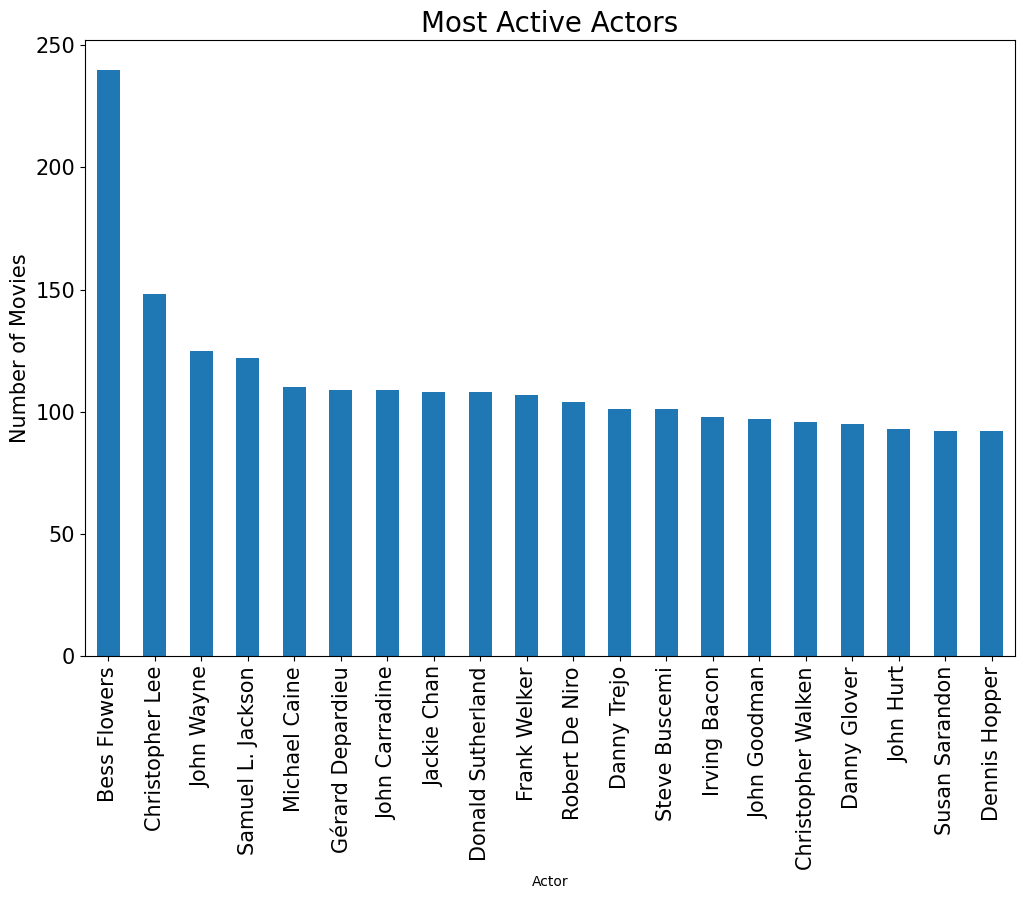

In [153]:
plt.figure(figsize = (12, 8))
act.Actor.value_counts().head(20).plot(kind='bar', fontsize = 15)
plt.title("Most Active Actors",fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()

In [154]:
agg = act.groupby("Actor").agg(Total_Revenue = ("revenue_musd", "sum"), 
                               Mean_Revenue = ("revenue_musd", "mean"),
                               Mean_Rating = ("vote_average", "mean"), 
                               Mean_Pop = ("popularity", "mean"), 
                               Total_Movies = ("Actor", "count"))

In [155]:
agg.nlargest(10, "Total_Movies")

Total_Revenue  Mean_Revenue  Mean_Rating  Mean_Pop  \
Actor                                                                   
Bess Flowers              368.91         14.76         6.18      2.03   
Christopher Lee          9417.05        324.73         5.91      4.75   
John Wayne                236.09         11.24         5.71      3.09   
Samuel L. Jackson       17109.62        213.87         6.27     11.70   
Michael Caine            8053.40        191.75         6.27      8.27   
Gérard Depardieu         1247.61         95.97         6.05      3.70   
John Carradine            255.84         19.68         5.55      2.43   
Donald Sutherland        5390.77        138.22         6.23      7.00   
Jackie Chan              4699.19        146.85         6.28      5.86   
Frank Welker            13044.15        326.10         6.31      9.57   

                   Total_Movies  
Actor                            
Bess Flowers                240  
Christopher Lee             148  
John Wayne                  125  
Samuel L. Jackson           122  
Michael Caine               110  
Gérard Depardieu            109  
John Carradine              109  
Donald Sutherland           108  
Jackie Chan                 108  
Frank Welker                107

In [156]:
agg.nlargest(10, "Total_Revenue")

Total_Revenue  Mean_Revenue  Mean_Rating  Mean_Pop  \
Actor                                                                   
Stan Lee                19414.96        647.17         6.51     29.94   
Samuel L. Jackson       17109.62        213.87         6.27     11.70   
Warwick Davis           13256.03        662.80         6.29     13.09   
Frank Welker            13044.15        326.10         6.31      9.57   
John Ratzenberger       12596.13        449.86         6.48     10.96   
Jess Harnell            12234.61        611.73         6.44     10.92   
Hugo Weaving            11027.58        459.48         6.47     10.97   
Ian McKellen            11015.59        478.94         6.35     15.45   
Johnny Depp             10653.76        217.42         6.44     12.38   
Alan Rickman            10612.63        353.75         6.72     10.40   

                   Total_Movies  
Actor                            
Stan Lee                     48  
Samuel L. Jackson           122  
Warwick Davis                34  
Frank Welker                107  
John Ratzenberger            46  
Jess Harnell                 35  
Hugo Weaving                 40  
Ian McKellen                 44  
Johnny Depp                  69  
Alan Rickman                 45

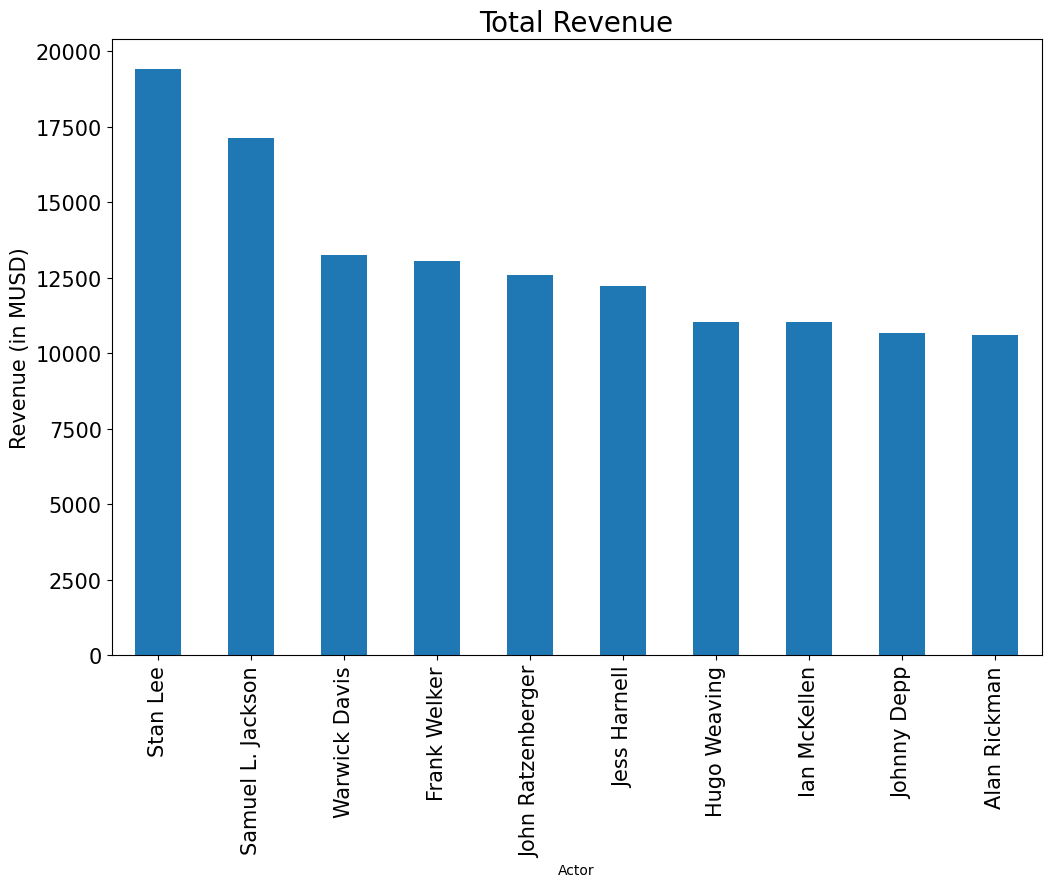

In [157]:
plt.figure(figsize = (12, 8))
agg.Total_Revenue.nlargest(10).plot(kind='bar', fontsize = 15)
plt.title("Total Revenue",fontsize = 20)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.show()

In [158]:
agg.Mean_Revenue.nlargest(10)

Actor
April Marie Thomas   2787.97
Ashley Jeffery       2787.97
Austin Wilson        2787.97
Brandon Jelkes       2787.97
Bravita A. Threatt   2787.97
Carvon Futrell       2787.97
Chris Mala           2787.97
Christa Oliver       2787.97
Christopher Nolen    2787.97
Colin Bleasdale      2787.97
Name: Mean_Revenue, dtype: float64

In [159]:
act[act.Actor == "Ashley Jeffery"]

Actor   title  revenue_musd  vote_average  popularity
id                                                                   
19995  Ashley Jeffery  Avatar       2787.97          7.20      185.07

In [160]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Revenue")

Total_Revenue  Mean_Revenue  Mean_Rating  Mean_Pop  \
Actor                                                                  
Gloria Stuart           1845.03       1845.03         6.37      3.48   
Keith Richards          2967.71        989.24         6.46      5.03   
Zoë Wanamaker            976.48        976.48         6.33      6.82   
James Cameron           1862.08        931.04         7.06      4.69   
Matthew Lewis           7915.31        879.48         7.37     23.10   
Luke de Woolfson        1720.67        860.34         5.72      8.77   
Yuri Lowenthal          1708.16        854.08         6.19     19.88   
Dominic Monaghan        3289.61        822.40         6.05     10.62   
Philip Ng                821.71        821.71         5.92      6.35   
Peter Mayhew            4820.72        803.45         6.70     12.30   

                  Total_Movies  
Actor                           
Gloria Stuart               18  
Keith Richards              23  
Zoë Wanamaker               10  
James Cameron               12  
Matthew Lewis               11  
Luke de Woolfson            11  
Yuri Lowenthal              17  
Dominic Monaghan            11  
Philip Ng                   10  
Peter Mayhew                11

In [161]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Rating")

Total_Revenue  Mean_Revenue  Mean_Rating  Mean_Pop  \
Actor                                                                    
Masao Hayama                 0.00           NaN         8.84      0.32   
David Attenborough           0.00           NaN         8.27      2.15   
Emil Jannings                0.00           NaN         7.78      1.70   
Halit Akçatepe               0.21          0.21         7.78      0.74   
Yo Oizumi                  511.21        102.24         7.72      7.51   
Şener Şen                   11.07          3.69         7.69      0.91   
Ayşen Gruda                  0.91          0.46         7.68      0.74   
Akira Tani                   0.33          0.16         7.65      5.04   
Joseph Oliveira           3543.44        354.34         7.64     34.45   
Björk                       51.33         25.67         7.62      2.36   

                    Total_Movies  
Actor                             
Masao Hayama                  10  
David Attenborough            11  
Emil Jannings                 10  
Halit Akçatepe                10  
Yo Oizumi                     13  
Şener Şen                     16  
Ayşen Gruda                   10  
Akira Tani                    12  
Joseph Oliveira               10  
Björk                         10

In [162]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Pop")

Total_Revenue  Mean_Revenue  Mean_Rating  Mean_Pop  \
Actor                                                                 
Katy Mixon             1519.57        151.96         5.84     51.97   
Terry Notary           6947.21        694.72         6.47     51.58   
Goran D. Kleut         2568.94        366.99         6.00     42.32   
Mark Smith             2195.52        243.95         6.55     40.08   
Jon Hamm               3449.35        191.63         6.33     39.42   
Gal Gadot              5449.53        495.41         6.33     37.39   
Ava Acres              6272.36        482.49         5.99     36.26   
Emma Watson            9639.20        535.51         6.77     35.97   
Joseph Oliveira        3543.44        354.34         7.64     34.45   
Keith Jardine          1062.49        212.50         5.96     32.00   

                 Total_Movies  
Actor                          
Katy Mixon                 12  
Terry Notary               11  
Goran D. Kleut             10  
Mark Smith                 11  
Jon Hamm                   25  
Gal Gadot                  11  
Ava Acres                  21  
Emma Watson                19  
Joseph Oliveira            10  
Keith Jardine              11